# **i. Perkenalan**

Program ini diproduksi oleh PT. Bank untuk tim marketing. Program ini dapat memprediksi apakah customer tertentu akan menerima tawaran deposito tetap atau tidak jika ditelpon. Hal ini dilakukan dengan membuat model machine learning klasifikasi berdasarkan data customer dari Januari 2020 hingga Januari 2024. Informasi yang dihasilkan dari model ini nantinya akan dijadikan sebagai bahan pertimbangan untuk tim marketing dalam penentuan customer mana daja yang perlu dilakukan penawaran.

## **A. Penjabaran masalah dan objektif berdasarkan SMART framework**

Specific:
Meningkatkan efisiensi biaya, waktu, dan tenaga yang dikeluarkan untuk menawarkan produk deposito tetap ke customer dengan cara menelpon.

Measurable:
Meningkatkan nilai Return on Marketing Investment (ROMI).

Achievable:
Membuat model machine learning yang bisa menentukan apakah customer memiliki kemungkinan menerima tawaran produk deposito tetap atau tidak.

Relevant:
Dengan memfokuskan metode penelponan pada customer-customer dengan tingkat kemungkinan tinggi akan menerima tawaran (hasil dari model), tim marketing dapat menerima bahan pertimbangan tambahan untuk mendefinisikan customer mana yang perlu ditelpon. Dengan adanya pertimbangan tambahan ini, tim marketing tidak perlu mencari informasi customer dari awal/dasar/scratch sehingga dapat meningkatkan efisiensi biaya, waktu, dan tenaga untuk marketing.

Time-bound:
Proyek ini perlu selesai dalam waktu 7 hari.

## **B. Penentuan jenis model machine learning**

Diperlukan model yang dapat menghasilkan jawaban apakah customer memiliki kemungkinan menerima tawaran produk deposito tetap (ya) atau tidak. Jawaban ya atau tidak merupakan atribut nominal. Maka dari itu, model yang dibutuhkan berjenis model klasifikasi.

Diperlukan model dengan tingkat True Positive yang tinggi dan False Positive yang rendah. Jika suatu customer terprediksi akan menerima suatu tawaran, (Positive) namun ternyata tidak (False), tim marketing akan membuang waktu, biaya, dan tenaga untuk menelpon customer ini. Maka dari itu, evaluasi model yang digunakan adalah precision.

## **C. Detil dari masalah**

Dalam penawaran produk perbankan, khususnya deposito tetap, metode yang biasa dilakukan adalah dengan menelpon customer. Deposito tetap adalah peluang investasi berjangka, dimana customer bisa menyimpan aset mereka selama periode tertentu untuk mendapatkan bunga. Dengan komunikasi dua arah ini, tim marketing dapat menerima pertanyaan, kekhawatiran, atau saran yang langsung bisa digunakan untuk memberikan penawaran yang dipersonalisasi (disesuaikan dengan kebutuhan dan preferensi spesifik pelanggan). Pada akhirnya, pendekatan ini membantu membangun kepercayaan customer dan meningkatkan kemungkinan pelanggan untuk memilih produk yang ditawarkan.

Walau efektif, metode menelpon ini tidak terlalu efisien. Metode ini bersifat manual sehingga membutuhkan tenaga, waktu, dan biaya yang banyak jika dibandingkan dengan digital markekting. Lalu, bisa saja customer tidak menerima telpon ini karena kesibukan mereka atau bahkan menjadi frustasi karena menerima panggilan berulang kali. Maka dari itu, dibutuhkan adanya metode tambahan yang bisa meningkatkan efesiensi metode panggilan ini.

Model machine learning dapat dimanfaatkan untuk mengidentifikasi customer dengan kemungkinan tertinggi untuk menerima tawaran deposito tetap. Model dapat dilatih berdasarkan data customer historis yang berisikan karakteristik customer dan kondisi apakah customer tersebut menerima atau menolak penawaran. Dengan memusatkan metode menelpon pada customer-customer ini, bank dapat meningkatkan tingkat konversi secara signifikan sekaligus meningkatkan efisiensi dalam hal waktu, tenaga, dan sumber daya. 


## **D. Penjabaran pemahaman bisnis seputar masalah**

Dikarenakan biaya marketing yang dimiliki Bank adalah terbatas, tim marketing perlu memikirkan cara menggunakan biaya ini sebaik-baiknya. Jika tidak, bisa saja pihak bank akan kehabisan biaya untuk penawaran selanjutnya. Kondisi ini dapat berdampak pada penawaran yang tidak relevan dengan customer dan menurunkan kemungkinan customer tersebut menerimanya. Pada akhirnya, bank akan mengalami kerugian.

## **E. Penjabaran Jenis Data yang Diperlukan**

Berdasarkan permasalahan di atas, dibutuhkan data yang berisikan nilai dari faktor-faktor yang berkaitan dengan:
* Karakteristik customer (seperti umur, pekerjaan, dan jumlah pendapatan)
* Informasi mengenai komunikasi marketing yang dilakukan sebelumnya
* Kondisi mengenai apakah customer menyetujui untuk berlangganan term deposito atau tidak.

# **ii. Import Libraries**

In [104]:
# Memanggil Module

# Module pengolahan data
import pandas as pd
import numpy as np

# Module Visualisasi
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

# Module perhitungan statistik
from scipy import stats
from scipy.stats import chi2_contingency, kstest

# Module Feature Engineering
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTENC
from feature_engine.outliers import Winsorizer

# Module Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Module Pemodelan
import time
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import joblib


# **iii. Data Loading**

## **A. Data Loading**

In [ ]:
# Membaca data csv dan mengubahnya sebagai dataframe
df_1 = pd.read_csv(r'data\file\location\bank-full.csv', delimiter=';')

## **B. Menjelaskan maksud dari masing-masing atribut**

Bagian ini bertujuan untuk menjelaskan maksud dari masing-masing atribut. Informasi ini didapat dari deskripsi dari data.

In [3]:
# Memperlihatkan sebagian dari dataframe
df_1.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Setiap baris data mengindikasi karakteristik pasien yang memiliki penyakit hati dan yang tidak

Penjelasan dari atribut:
* age: Umur dari customer - Numerik
* job: Jenis pekerjaan customer - Kategorik
* marital: Kondisi perkawinan customer - Kategorik
* education: Jenis edukasi terakhir customer - Numerik
* default: Kondisi dimana customer sebelumnya pernah gagal membayar kredit dalam jangka waktu yang sudah disetujui ('yes': Terjadi pada customer, 'no': Tidak terjadi pada customer) - Kategorik
* balance: Nilai rata-rata tahunan pendapatan yang diterima oleh customer dalam Euro - Numerik
* housing: Kondisi kepemilikan rumah dari customer - Kategorik, Ordinal, Multiclass
* loan: Kondisi dimana customer sebelumnya pernah mengambil pinjaman pribadi (tidak dijamin dengan agunan) dari bank ('yes': Terjadi pada customer, 'no': Tidak terjadi pada customer) - Kategorik
* contact: Jenis komunikasi marketing yang sebelumnya dilakukan pada customer - Kategorik
* day: Tanggal dari komunikasi marketing yang sebelumnya dilakukan pada customer - Numerik
* month: Bulan dari komunikasi marketing yang sebelumnya dilakukan pada customer - Kategorik
* duration: Lama hari saat melakukan komunikasi marketing yang sebelumnya dilakukan pada customer - Numerik
* campaign: Total jumlah komunikasi marketing yang dilakukan pada customer untuk marketing campaign saat ini- Numerik
* pdays: Jumlah hari dari waktu terakhir customer dilakukan komunikasi marketing untuk marketing campaign sebelumnya hingga marketing campaign saat ini. Jika nilainya -1, maka customer tersebut belum pernah dilakukan komunikasi marketing. - Numerik
* previous: Total jumlah komunikasi marketing yang dilakukan pada customer untuk marketing campaign sebelumnya - Numerik
* poutcome: Jenis dari komunikasi marketing untuk marketing campaign saat ini - Kategorik
* y: Kondisi dimana customer menyetujui untuk berlangganan term deposito - Kategorik

## **C. Mengetahui relevansi data dengan masalah yang dijabarkan.**

Data yang tidak relevan dengan masalah yang dijabarkan dapat membuat tidak efisiennya pengerjaan EDA dan FE. Maka dari itu, relevansi ini perlu dicek. Bagian ini bertujuan untuk mengetahui apakah data yang dimiliki sesuai dengan yang dibutuhkan oleh model.

Data ini memiliki beberapa atribut dimana:
* Atribut age, job, marital, education, default, balance, housing dan loan menjelaskan tentang karakteristik dari customer.
* Atribut contact, day, month, duration, campaign, pdays, previous dan poutcome menjelaskan tentang informasi mengenai komunikasi marketing yang dilakukan sebelumnya.
* Atribut y menjelaskan tentang apakah customer menyetujui untuk berlangganan term deposito atau tidak.

Berdasarkan penjelasan di atas, semua atribut data sesuai dengan kebutuhan dan data bisa cocok untuk pemodelan.

## **D. Persiapan data**

### **1. Mengecek kesesuaian maksud atribut dengan tipe data**

Bagian ini bertujuan untuk mengecek kesesuaian maksud atribut dengan tipe data

In [4]:
# Memperlihatkan informasi general dari dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Berdasarkan informasi di atas,
* Atribut age, balance, day, duration, campaign, pdays, dan previous memiliki tipe atribut integer dimana sesuai dengan maksud dari atributnya yang berupa numerik.
* Atribut job, marital, education, default, housing, loan, contact, month, poutcome, dan y memiliki tipe atribut object dimana sesuai dengan maksud dari atributnya yang berupa kategorik.

Maka dari itu, dapat disimpulkan bahwa semua atribut memiliki tipe data yang sesuai dengan maksudnya.

### **2. Mengecek baris yang duplikat**

Data yang diambil dari sumber manapun bisa saja memiliki baris data yang duplikat. Hal ini terjadi karena adanya kesalahan pada input data. Kondisi ini mengakibatkan data tersebut tidak bisa dipakai untuk analisa regresi. Maka dari itu, kondisi ini perlu dicek.

In [5]:
# Memperlihatkan jumlah keseluruhan baris data
print('Jumlah baris untuk keseluruhan data adalah', df_1.shape[0])
# Memperlihatkan jumlah baris data yang dihapus duplikatnya
print('Jumlah baris ketika baris duplikat dihilangkan adalah', df_1.drop_duplicates().shape[0])
print('Terdapat', df_1.shape[0]-df_1.drop_duplicates().shape[0], 'baris yang terduplikat')

Jumlah baris untuk keseluruhan data adalah 45211
Jumlah baris ketika baris duplikat dihilangkan adalah 45211
Terdapat 0 baris yang terduplikat


Dari informasi di atas, tidak ada baris yang memiliki kesamaan pada semua nilai atribut dengan baris lain. Hal ini ditandai oleh tidak ada perbedaan dari jumlah baris keseluruhan dan jumlah baris ketika baris duplikat dihilangkan.

### **3. Mengecek cell dengan jumlah data lebih dari satu pada tipe data object**

Satu cell bisa saja memiliki data lebih dari satu dengan tipe data list atau dictionary. Hal ini terjadi karena adanya kesalahan pada proses input data. Maka dari itu, kondisi ini perlu dicek.

Untuk atribut numerik, jika semua cell berisi angka, maka tipe data akan berupa integer atau float. Namun, jika salah satu cell berisi list, maka tipe data bakan berubah menjadi object. Maka dari itu, atribut numerik tidak perlu dicek lebih lanjut karena sudah dilakukan di poin sebelumnya.

Untuk atribut kategorik, tipe data object dapat berarti semua cell berisi teks atau terdapat cell berisi list. Maka dari itu, atribut kategorik perlu dicek.

In [6]:
def f_konsistensi_tipe_data(dataframe):
    '''
    Fungsi ini bertujuan untuk mencari cell pada dataframe yang memiliki tipe data list, dictionary, dan list

    Input: dataframe
    OutputL: Informasi nama_kolom, indeks, nilai_cell, dan tipe_data yang bertipe list, dictionary, atau list

    '''
    # Membuat list kosong yang akan diisi dengan baris yang memiliki tipe data bukan string dan angka
    data = {
        'nama_kolom': [],
        'indeks': [],
        'nilai_cell' : [],
        'tipe_data' : [],
    }
    df_temp = pd.DataFrame(data)
    # Melakukan looping nama-nama kolom
    for column_name in dataframe:
        # Melakukan looping baris
        for row_index in range(dataframe.shape[0]):
            # Conditional untuk mencari baris yang memiliki tipe data bukan string dan angka
            cell = dataframe[column_name].iloc[row_index]
            if type(cell) not in [np.float64, np.int64, str]:
                # Mengisi baris yang memiliki tipe data bukan string dan angka ke dalam dataframe
                new_row = pd.DataFrame({'nama_kolom': [column_name],
                                        'indeks': [row_index],
                                        'nilai_cell': dataframe[column_name].iloc[row_index],
                                        'tipe_data': type(dataframe[column_name].iloc[row_index])})
                df_temp = pd.concat([df_temp, new_row], ignore_index=True)
    return df_temp

# Memanggil fungsi f_konsistensi_tipe_data untuk mengecek cell dengan jumlah data lebih dari satu pada tipe data object 
df_temp = f_konsistensi_tipe_data(df_1)
df_temp.head(5)


,nama_kolom,indeks,nilai_cell,tipe_data


Dari informasi di atas, semua atribut kategorik tidak memiliki nilai yang berupa list atau series.

# **iv. Exploratory Data Analysis (EDA)**

## **A. Dimensi data**

Terdapat beberapa metode EDA, FE dan model yang hanya cocok pada data dengan kondisi dataset kecil dan low dimensional. Menggunakan metode yang tidak sesuai dengan kondisi data dapat menghasilkan performa model yang rendah. Maka dari itu, kondisi ini perlu dicek.

In [7]:
# Memperlihatkan dimensi dari data
df_1.shape

(45211, 17)

Berdasarkan informasi di atas,
* Data memiliki jumlah baris sebanyak 45211 baris
* Data memiliki jumlah atribut sebanyak 17 atribut

Maka dari itu, data yang digunakan memiliki kondisi dataset yang besar dan low dimensional.

## **B. Jumlah data unik**

Data yang memiliki atribut kategorik yang memiliki jumlah data unik yang terlalu banyak tidak dapat memberikan pola unik ke dalam pemodelan. Bagian ini bertujuan untuk melihat jumlah data unik untuk setiap atribut kategorik.

In [8]:
def f_data_unik_kategorik(dataframe):
    '''
    Fungsi ini bertujuan untuk membuat daftar data unik yang ada di dalam semua atribut kategorik dataframe

    Input: dataframe
    Output: Informasi nama_kolom, jumlah_data_unik, dan data_unik yang dimiliki oleh dataframe

    '''
    # Mempersiapkan dataframe kosong
    data = {'nama_kolom': [],
            'jumlah_data_unik': [],
            'data_unik': []}
    df_temp = pd.DataFrame(data)
    # Looping berdasarkan nama kolom
    for column_name in dataframe:
        # Menfilter data bertipe object
        if dataframe[column_name].dtype == 'O':
            # Menghitung jumlah data unik
            jumlah_data_unik = dataframe[column_name].value_counts().count()
            # Membuat daftar data unik
            if jumlah_data_unik<20: data_unik = ', '.join([i for i in dataframe[column_name].unique()])
            else: data_unik = 'TOO MANY'
            # Memasukkan informasi data unik ke dalam dataframe
            new_row = pd.DataFrame({'nama_kolom': [column_name],
                                    'jumlah_data_unik': [jumlah_data_unik],
                                    'data_unik': [data_unik]})
            df_temp = pd.concat([df_temp, new_row], ignore_index=True)
    # Mengeluarkan informasi data unik
    return df_temp

In [9]:
# Memanggil fungsi f_data_unik_kategorik untuk melihat data unik setiap atribut
df_temp = f_data_unik_kategorik(df_1)
# Menyetel ukuran dataframe yang diperlihatkan
pd.set_option('max_colwidth', None)
# Memperlihatkan dataframe
df_temp

,nama_kolom,jumlah_data_unik,data_unik
0,job,12.0,"management, technician, entrepreneur, blue-collar, unknown, retired, admin., services, self-employed, unemployed, housemaid, student"
1,marital,3.0,"married, single, divorced"
2,education,4.0,"tertiary, secondary, unknown, primary"
3,default,2.0,"no, yes"
4,housing,2.0,"yes, no"
5,loan,2.0,"no, yes"
6,contact,3.0,"unknown, cellular, telephone"
7,month,12.0,"may, jun, jul, aug, oct, nov, dec, jan, feb, mar, apr, sep"
8,poutcome,4.0,"unknown, failure, other, success"
9,y,2.0,"no, yes"


Berdasarkan informasi di atas, tidak ada atribut yang memiliki jumlah data unik lebih dari 12, maka dari itu pemodelan tidak akan terganggu karena jumlah data unik yang terlalu banyak.

## **C. Distribusi Data**

Terdapat beberapa metode EDA, FE dan model yang hanya cocok pada data dengan kondisi distribusi normal. Distribusi data yang tidak normal adalah kondisi dimana tidak terdapat banyak data pada nilai tertentu dibandingkan nilai lainnya. Menggunakan metode yang tidak sesuai dengan kondisi data dapat menghasilkan performa model yang rendah. Maka dari itu, kondisi ini perlu dicek.

### **1. Distribusi Atribut Kategorik**

Bagian ini bertujuan untuk melihat jumlah setiap data unik untuk masing-masing atribut kategorik.

In [10]:
def f_distribusi_kategorik(dataframe, drop_feature=''):
    '''
    Fungsi ini bertujuan untuk melihat frekuensi dan persentase data unik untuk semua atribut kategorik

    Input: dataframe, atribut yang tidak ingin diikutkan
    Output: Informasi nama_kolom, nama_unique_data, jumlah, dan persentase yang dimiliki oleh data unik untuk semua atribut kategorik

    '''
    # Menghilangkan atribut yang tidak ingin diikutkan
    if drop_feature != '': dataframe = dataframe.drop(drop_feature, axis=1)
    # Membuat dataframe kosong yang nantinya akan diisi oleh informasi distribusi data
    data = {'nama_kolom': [],
            'nama_unique_data': [],
            'jumlah' : [],
            'persentase' : []}
    df_temp = pd.DataFrame(data)

    # Melakukan looping beerdasarkan nama kolom
    for column_name in dataframe:
        # Menfilter atribut yang bertipe string
        if dataframe[column_name].dtype == 'O':
            # Melakukan looping berdasarkan index unik data
            for unique_data in dataframe[column_name].unique():
                # Membuat baris dataframe baru berisi jumlah dan persentase data unik
                jumlah = dataframe[dataframe[column_name]==unique_data].count().max()
                persentase = round(jumlah/dataframe.shape[0]*100)
                new_row = pd.DataFrame({'nama_kolom': [column_name],
                                        'nama_unique_data': [unique_data],
                                        'jumlah': [jumlah],
                                        'persentase': [persentase]
                                        })
                # Menggabungkan dataframe sebelumnya dengan yang baru
                df_temp = pd.concat([df_temp, new_row])
    return df_temp

# Memanggil fungsi f_distribusi_kategorik untuk mengecek distribusi data kategorik
df_temp = f_distribusi_kategorik(df_1)
# Memperlihatkan dataframe
df_temp

,nama_kolom,nama_unique_data,jumlah,persentase
0,job,management,9458.0,21.0
0,job,technician,7597.0,17.0
0,job,entrepreneur,1487.0,3.0
0,job,blue-collar,9732.0,22.0
0,job,unknown,288.0,1.0
0,job,retired,2264.0,5.0
0,job,admin.,5171.0,11.0
0,job,services,4154.0,9.0
0,job,self-employed,1579.0,3.0
0,job,unemployed,1303.0,3.0


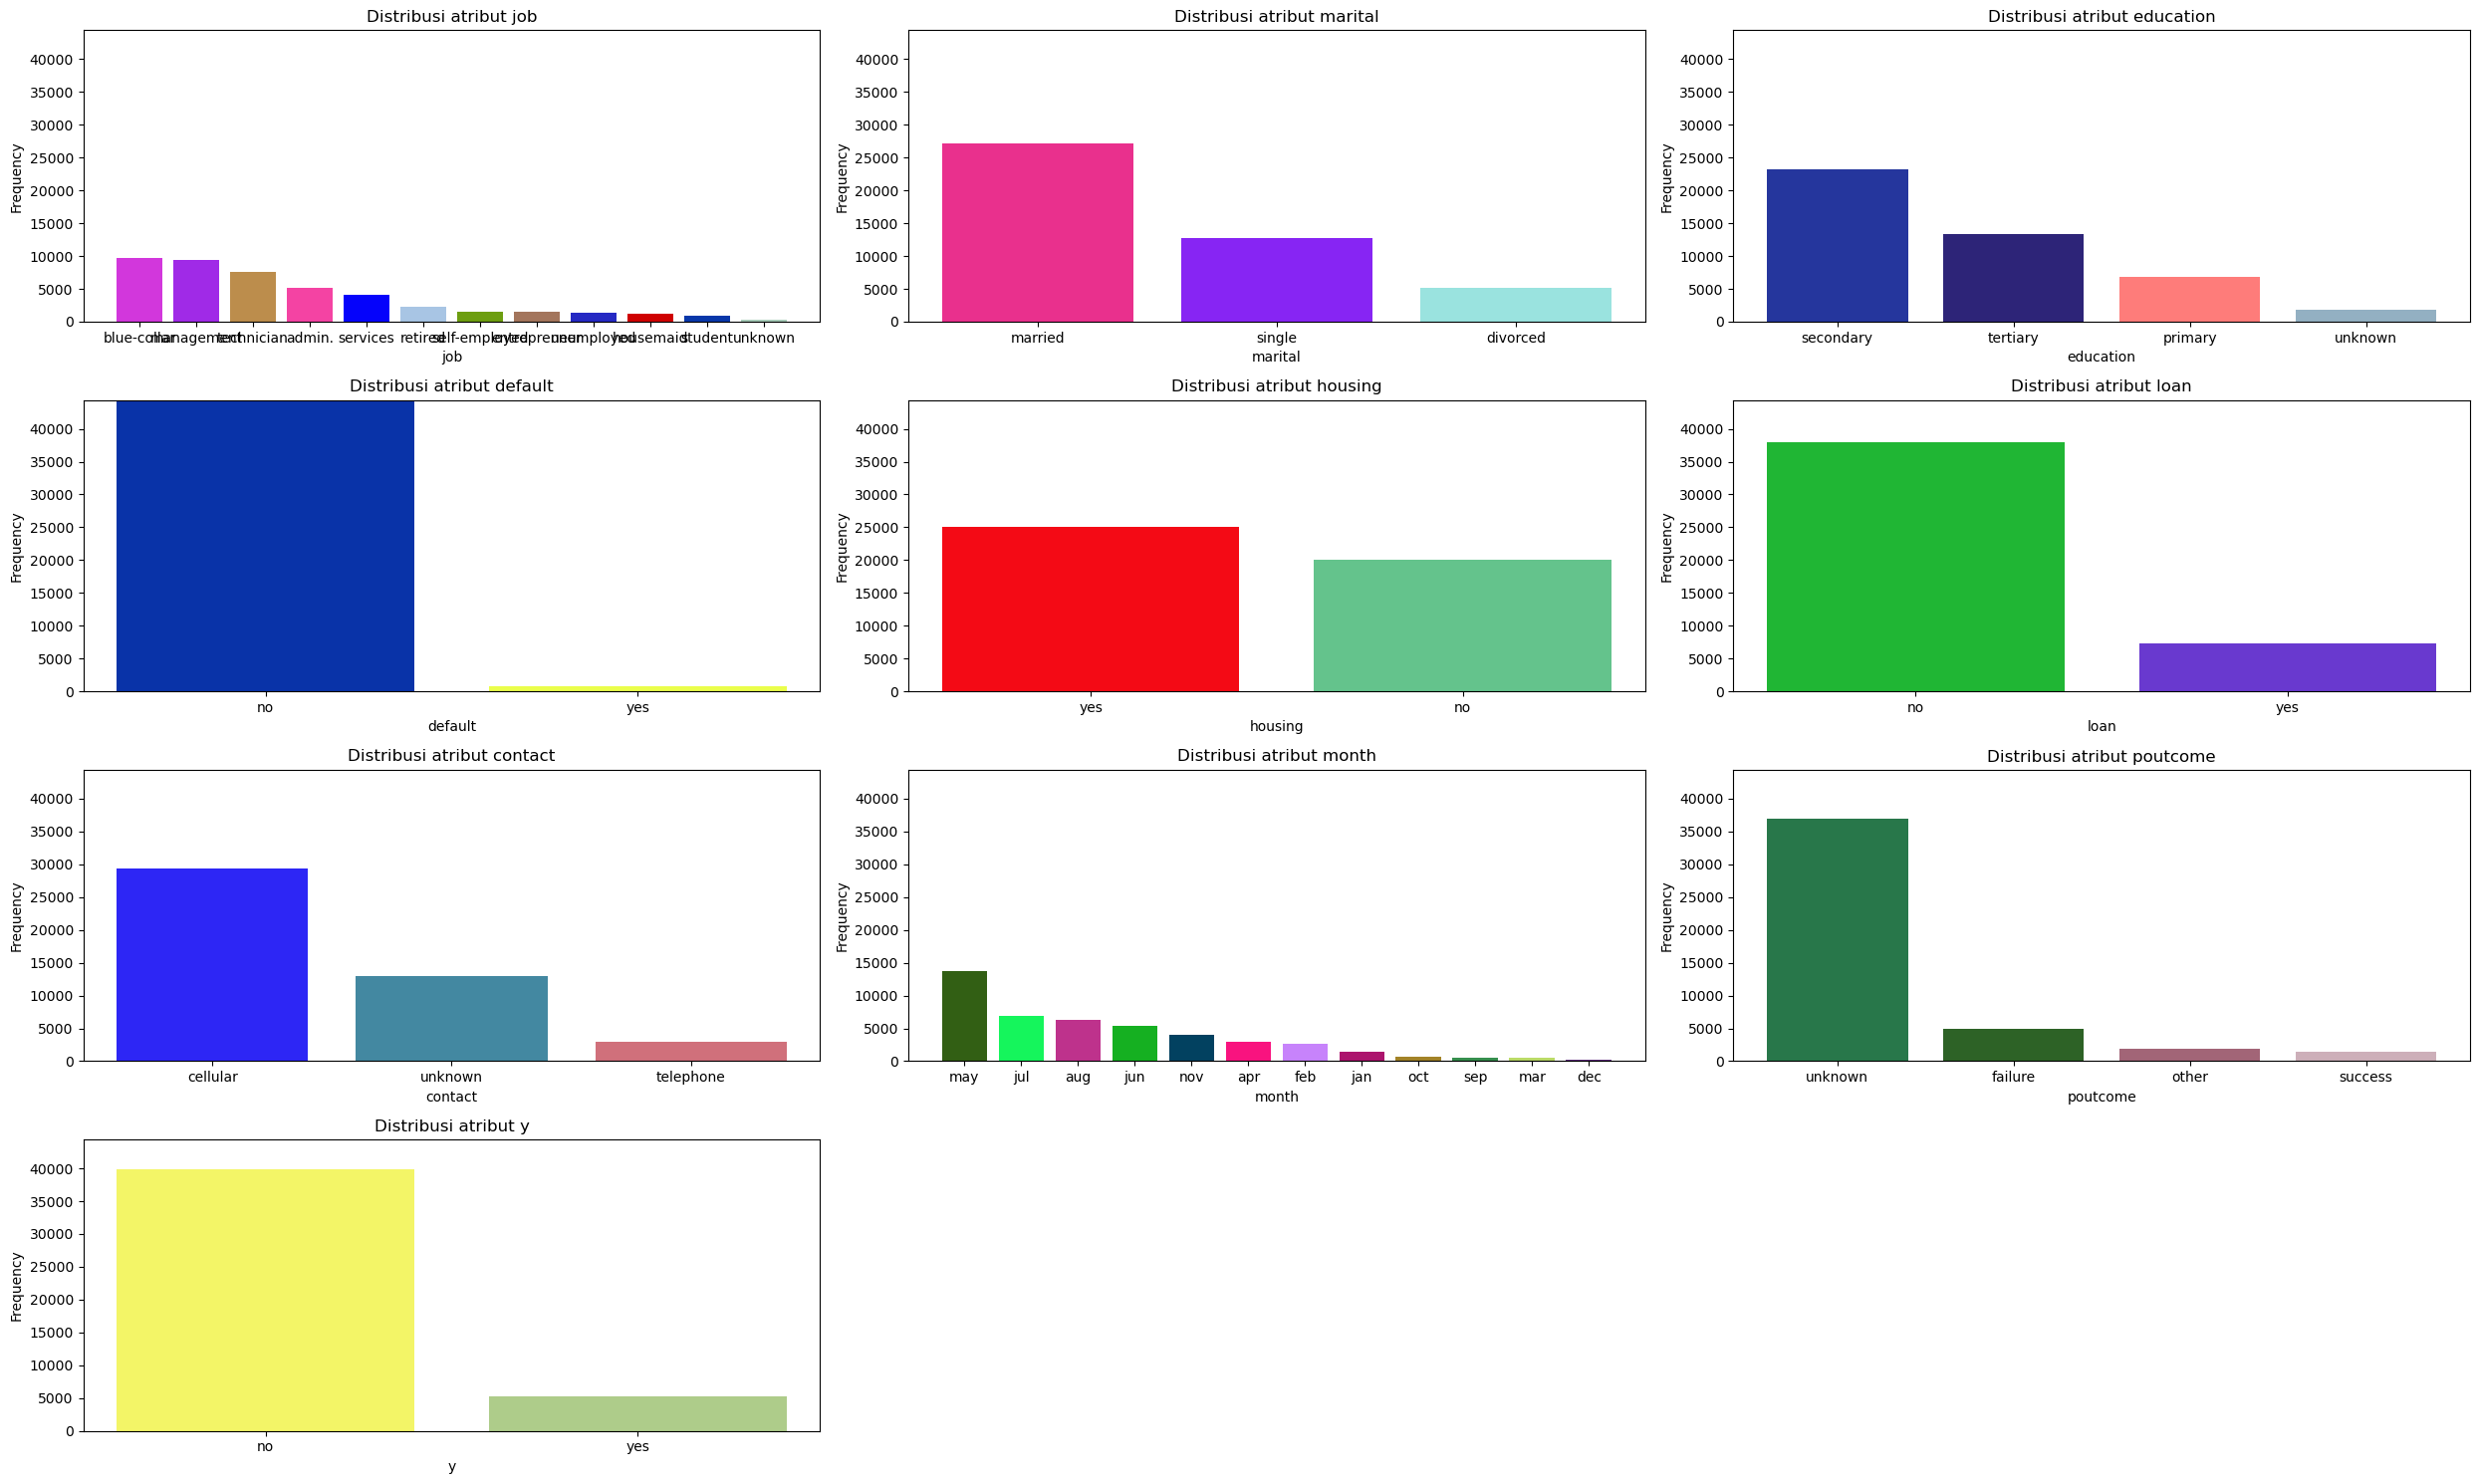

In [11]:
def f_bar_kategorik(dataframe, fig_per_row = 3, hor_size = 20, ver_size = 10):
    '''
    Fungsi ini bertujuan untuk memperlihatkan bar chart dari atribut kategorik

    Input: dataframe,
           fig_per_row : Pengaturan jumlah figure dalam baris
           hor_size : Ukuran horizontal figure
           ver_size : Ukuran vertikal figure
    Output: Bar chart dari atribut kategorik

    '''
    # List kolom numerik
    kolom_numeric = [i for i in dataframe if dataframe[i].dtype != 'O']

    # Membuat dataframe kosong
    df_temp = pd.DataFrame()
    # Menghilangkan atribut numeric pada dataframe
    df_temp = dataframe.drop(columns=kolom_numeric)

    # Mencari nilai frekuensi maksimum dari semua kolom untuk membuat y-axis scale yang sama
    frek_maks = df_temp.apply(lambda column_name: column_name.value_counts().max()).max()

    # Membuat bar chart
    row = math.ceil(df_temp.shape[1]/fig_per_row)
    fig, ax = plt.subplots(row, fig_per_row, figsize=(hor_size, ver_size))
    ax = ax.flatten()

    # Mengatur bar chart
    for i, column_name in enumerate(df_temp):
        counts = df_temp[column_name].value_counts()
        colors = [[random.random() for _ in range(3)] for _ in range(len(counts))] # Membuat warna random
        ax[i].bar(counts.index, counts.values, color=colors)
        ax[i].set_title(f'Distribusi atribut {column_name}')
        ax[i].set_xlabel(column_name)
        ax[i].set_ylabel('Frequency')
        ax[i].set_ylim(0, frek_maks) # Menyamakan semua scale pada y-axis
    
    # Menghilangkan bingkai fig yang tidak terpakai
    for j in range(i + 1, len(ax)):
        ax[j].set_visible(False)
    
    # Memberikan figure
    return fig, ax

# Menggunakan fungsi f_bar_kategorik untuk membuat bar chart dari atribut kategorik
fig, ax = f_bar_kategorik(df_1, fig_per_row = 3, hor_size = 25, ver_size = 15)
plt.tight_layout()
plt.show()

Berdasarkan informasi dan visual di atas,
* Atribut default memiliki kondisi distribusi kategori yang sangat tidak seimbang, yakni kategori yes sebanyak 2% dan kategori no sebanyak 98%.
* Atribut y yang digunakan sebagai atribut target juga memiliki kondisi distribusi kategori yang sangat tidak seimbang, yakni kategori yes sebanyak 12% dan kategori no sebanyak 88%.

Maka dari itu, kondisi ini perlu ditangani saat FE.

### **2. Distribusi Atribut Numerik**

Bagian ini bertujuan untuk menghitung nilai mean, median, skewness, dan kurtosis pada atribut numerik. Selain itu, dilakukan perhitungan uji test Kolmogorov-Smirnov untuk mengetahui apakah data bersifat normal atau tidak. Tes ini memiliki dua hipotesis,

* Hipotesis null: Data memiliki distribusi normal
* Hipotesis alternatif: Data tidak memiliki distribusi normal

Jika nilai p-value yang dihasilkan dari tes lebih kecil dari 0.05 (confidence level 95%) maka hipotesis null berhasil ditolak dimana data tidak memiliki distribusi normal

In [12]:
def f_stat_numerik(dataframe):
    '''
    Fungsi ini bertujuan untuk melakukan perhitungan statistik diferensial untuk masing-masing atribut numerik

    Input: dataframe
    Output: Informasi, nama_kolom, mean, median, mode, skewness, kurtosis, shapiro_wilk_test_p_value, dan normality untuk masing-masing atribut numerik

    '''
    # Membuat dataframe kosong
    df_temp = pd.DataFrame()

    # Melakukan looping berdasarkan nama atribut numerik pada dataframe
    for column_name in dataframe:
        if dataframe[column_name].dtype != 'O':
            # Menghitung kstest untuk normality
            ks_stat, p_value = kstest(dataframe[column_name], 'norm')
            if p_value<0.05: normality = 'non-normal'
            else: normality = 'normal'
            # Memasukkan perhitungan statistik diferensial ke dalam dataframe
            new_row = pd.DataFrame({'nama_kolom': [column_name],
                                    'mean': [dataframe[column_name].mean()],            # Menghitung rata-rata
                                    'median': [dataframe[column_name].median()],        # Menghitung median
                                    'mode': [dataframe[column_name].mode().values[0]],  # Menghitung mode
                                    'skewness': [dataframe[column_name].skew()],        # Menghitung skewness
                                    'kurtosis': [dataframe[column_name].kurtosis()],    # Menghitung kurtosis
                                    'shapiro_wilk_test_p_value': [p_value],
                                    'normality': [normality]
                                    })
            # Menggabungkan dataframe sebelumnya
            df_temp = pd.concat([df_temp, new_row], ignore_index=True)
    # Mengembalikan dataframe
    return df_temp


df_temp = f_stat_numerik(df_1)
df_temp

,nama_kolom,mean,median,mode,skewness,kurtosis,shapiro_wilk_test_p_value,normality
0,age,40.936210,39.0,32,0.684818,0.319570,0.0,non-normal
1,balance,1362.272058,448.0,0,8.360308,140.751547,0.0,non-normal
2,day,15.806419,16.0,20,0.093079,-1.059897,0.0,non-normal
3,duration,258.163080,180.0,124,3.144318,18.153915,0.0,non-normal
4,campaign,2.763841,2.0,1,4.898650,39.249651,0.0,non-normal
5,pdays,40.197828,-1.0,-1,2.615715,6.935195,0.0,non-normal
6,previous,0.580323,0.0,0,41.846454,4506.860660,0.0,non-normal


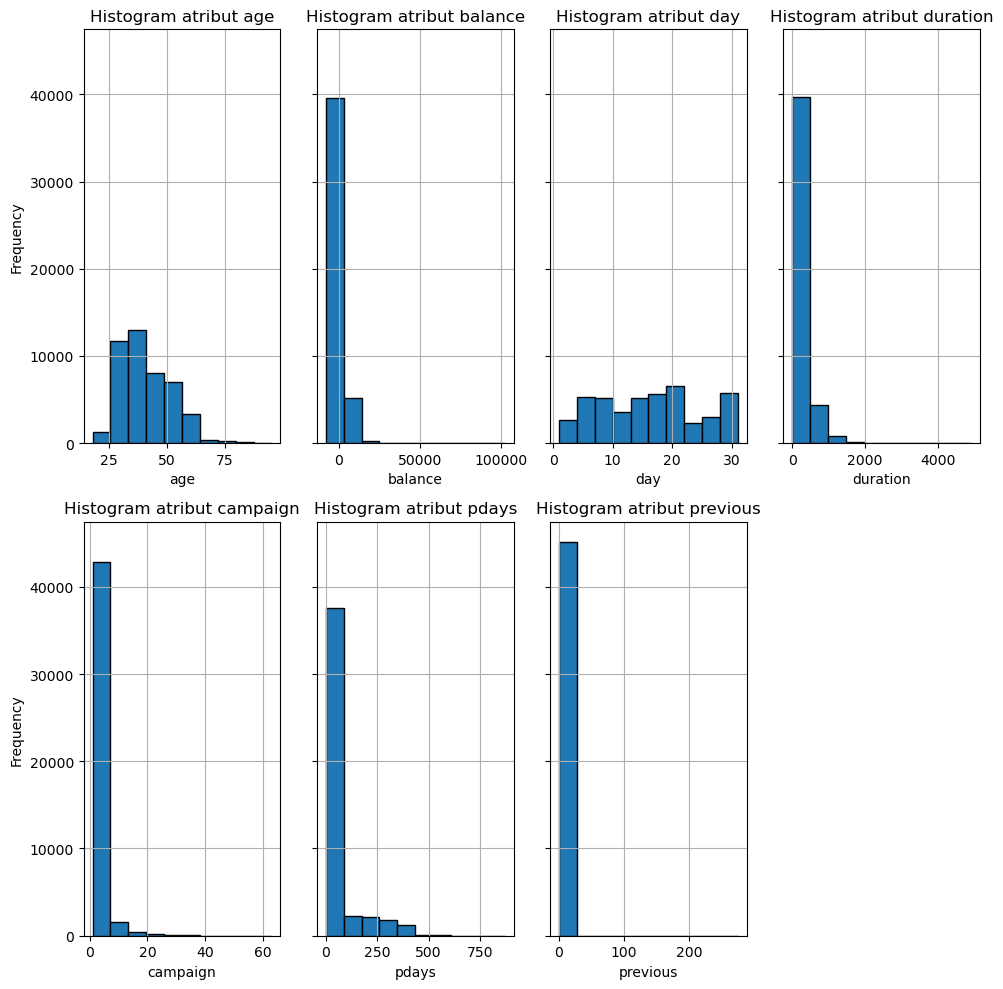

In [13]:
def f_histogram_numerik(dataframe, fig_per_row = 3, hor_size = 15, ver_size = 10):
    '''
    Fungsi ini bertujuan untuk memperlihatkan histogram dari atribut numerik

    Input: dataframe,
           fig_per_row : Pengaturan jumlah figure dalam baris
           hor_size : Ukuran horizontal figure
           ver_size : Ukuran vertikal figure
    Output: Histogram dari atribut numerik

    '''
    # Menghilangkan atribut kategorik dari dataframe
    df_temp = dataframe.drop(columns=[i for i in dataframe if dataframe[i].dtype == 'O'])
    # Membuat dataframe yang berisi atribut numeric
    row = math.ceil(df_temp.shape[1]/fig_per_row)
    histogram = df_temp.hist(figsize=(hor_size, ver_size), bins=10, edgecolor='black', grid=True, sharey=True, layout=(row, fig_per_row))
    histogram = histogram.flatten()
    # Melakukan looping berdasarkan jumlah histogram
    for histogram_name, atribut in zip(histogram, df_temp.columns):
        histogram_name.set_title(f"Histogram atribut {atribut}") # Membuat judul histogram
        histogram_name.set_xlabel(atribut)  # Membuat label x-axis
        histogram_name.set_ylabel("Frequency") # Membuat label y-axis

    # Menghilangkan figure yang tidak terisi
    for j in range(len(df_temp.columns), len(histogram)):
        histogram[j].set_visible(False)

    # Mengembalikkan histogram    
    return histogram

histogram = f_histogram_numerik(df_1, fig_per_row = 4, hor_size = 10, ver_size = 10)
plt.tight_layout()
plt.show()

Dari informasi dan visual di atas,
* Semua atribut numerik memiliki distribusi data yang tidak normal.
* Semua atribut memiliki positive skewness dimana kebanyakan data berpusat di sebelah kiri, kecuali atribut day dengan simmetry skewness.
* Atribut previous yang memiliki nilai skewness yang paling besar, yakni 42.

Maka dari itu, kondisi ini perlu ditangani saat FE.

## **D. Missing Values**

Data yang diambil dari sumber manapun bisa saja memiliki missing value dimana suatu feature pada baris tertentu tidak memiliki nilai apapun. Kondisi ini mengakibatkan data tersebut tidak bisa dipakai untuk analisa regesi. Maka dari itu, kondisi ini perlu dicek.

Missing values bisa diketahui oleh dataframe secara langsung jika ditandai dengan None. Hal ini bisa berlaku untuk atribut berjenis categorical dan numeric.
Namun, ada pula missing value yang tidak bisa diketahui oleh dataframe secara langsung jika ditandai dengan angka 0 atau 999 (untuk atribut numeric) dan teks missing (untuk atribut categorical).

Kondisi missing values nantinya akan dicek ulang dan ditangani dalam proses FE.

### 1. Mengecek missing values yang ditandai dengan None

In [14]:
# Memperlihatkan informasi general dari dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Berdasarkan informasi di atas, tidak ada atribut yang memiliki missing values.

### 2. Mengecek missing values yang tidak ditandai dengan None pada atribut kategorik

In [15]:
# Memanggil fungsi f_data_unik_kategorik untuk melihat jumlah dan persentase data unik
df_temp = f_data_unik_kategorik(df_1)
# Menyetel ukuran dataframe yang diperlihatkan
pd.set_option('max_colwidth', None)
# Memperlihatkan dataframe
df_temp

,nama_kolom,jumlah_data_unik,data_unik
0,job,12.0,"management, technician, entrepreneur, blue-collar, unknown, retired, admin., services, self-employed, unemployed, housemaid, student"
1,marital,3.0,"married, single, divorced"
2,education,4.0,"tertiary, secondary, unknown, primary"
3,default,2.0,"no, yes"
4,housing,2.0,"yes, no"
5,loan,2.0,"no, yes"
6,contact,3.0,"unknown, cellular, telephone"
7,month,12.0,"may, jun, jul, aug, oct, nov, dec, jan, feb, mar, apr, sep"
8,poutcome,4.0,"unknown, failure, other, success"
9,y,2.0,"no, yes"


Berdasarkan informasi di atas, terdapat beberapa atribut yang memiliki data terindikasi sebagai missing values, diantaranya adalah:
* Atribut job memiliki nilai unknown
* Atribut education memiliki nilai unknown
* Atribut contact memiliki nilai unknown
* Atribut poutcome memiliki nilai unknown

### 3. Mengecek missing values yang tidak ditandai dengan None pada atribut numerik

In [16]:
def f_min_max_numerik(dataframe):
    '''
    Fungsi ini bertujuan untuk membuat daftar nilai minimal dan maksimal untuk masing-masing atribut numerik

    Input: dataframe
    Output: Informasi nama_kolom, min, dan max yang dimiliki oleh masing-masing atribut numerik

    '''
    # Mempersiakpak dataframe kosong
    data = {'nama_kolom': [],
            'min': [],
            'max': []}
    df_temp = pd.DataFrame(data)
    # Membuat looping berdasarkan nama kolom
    for column_name in dataframe:
        # Menfilter kolom yang memiliki data dengan tipe string
        if type(dataframe[column_name][0]) != str:
            # Membuat dataframe baru yang berisi nama_kolom, min, dan max
            new_row = pd.DataFrame({'nama_kolom': [column_name],
                                    'min': [dataframe[column_name].min()],
                                    'max': [dataframe[column_name].max()]})
            # Menggabungkan dataframe lama dan yang baru
            df_temp = pd.concat([df_temp, new_row])
        else: continue
    # Memberikan dataframe
    return df_temp

# Memanggil fungsi f_min_max_numerik untuk mengecek missing values yang tidak ditandai dengan None pada atribut numerik
df_temp = f_min_max_numerik(df_1)
df_temp

,nama_kolom,min,max
0,age,18.0,95.0
0,balance,-8019.0,102127.0
0,day,1.0,31.0
0,duration,0.0,4918.0
0,campaign,1.0,63.0
0,pdays,-1.0,871.0
0,previous,0.0,275.0


Berdasarkan informasi di atas, atribut balance dan pdays memiliki nilai aneh dimana memiliki nilai negatif dimana mengindikasi ada missing values pada kedua atribut ini.

## **E. Outliers**

Data yang diambil dari sumber manapun bisa saja memiliki outlier dimana terdapat data dengan nilai yang sangat berbeda dengan yang lainnya. Kondisi ini mengacaukan hasil pemodelan. Maka dari itu, kondisi ini perlu dicek.

Untuk atribut kategorik, hal ini bisa dicek jika terdapat data unik yang memiliki kesamaan dengan data unik lainnya. Contoh, Bogor dengan Bogaa dimana Bogaa adalah outlier.

### 1. Mengecek outlier pada atribut kategorik

In [17]:
# Memanggil fungsi f_data_unik_kategorik untuk mengecek outlier pada atribut kategorik
df_temp = f_data_unik_kategorik(df_1)
# Memperlihatkan dataframe
df_temp

,nama_kolom,jumlah_data_unik,data_unik
0,job,12.0,"management, technician, entrepreneur, blue-collar, unknown, retired, admin., services, self-employed, unemployed, housemaid, student"
1,marital,3.0,"married, single, divorced"
2,education,4.0,"tertiary, secondary, unknown, primary"
3,default,2.0,"no, yes"
4,housing,2.0,"yes, no"
5,loan,2.0,"no, yes"
6,contact,3.0,"unknown, cellular, telephone"
7,month,12.0,"may, jun, jul, aug, oct, nov, dec, jan, feb, mar, apr, sep"
8,poutcome,4.0,"unknown, failure, other, success"
9,y,2.0,"no, yes"


Berdasarkan informasi di atas, untuk semua atribut, tidak ada data unik yang hampir mirip dengan yang lainnya. Maka dari itu, dapat disimpulkan bahwa outlier tidak terdapat pada atribut kategorik.

### 2. Mengecek outlier pada atribut numerik

Bagian ini bertujuan untuk mengetahui kondisi outlier pada atribut numerik. Jika distribusi pada suatu atribut adalah simetris, maka metode penentuan outlier yang digunakan adalah Z-score. Lalu, jika suatu atribut memiliki data yang tidak simetris, maka metode penentuan outlier yang digunakan adalah Tukey's Rule. Kedua metode ini akan membuat suatu rentang dimana data yang ada di luar rentang ini akan dikategorikan sebagai outlier.

In [18]:
def f_outlier_numerik(dataframe):
    '''
    Fungsi ini bertujuan untuk menghitung outlier pada masing-masing atribut menggunakan z score atau tukey rule yang ditentukan oleh skewness dari data

    Input: dataframe
    Output: Informasi nama_kolom, skewness, tes, batas_atas, batas_bawah, jumlah_outlier, dan persentase_outlier yang dimiliki oleh dataframe

    '''
    # Mempersiapkan list kosong
    nama_kolom = []
    skewness = []
    tes = []
    batas_bawah = []
    batas_atas = []
    jumlah_outlier = []
    persentase_outlier = []

    # Membuat list berisi atribut bertipe non-object
    kolom_numeric = [i for i in dataframe if dataframe[i].dtype != 'O']

    # Looping nama kolom
    for column_name in kolom_numeric:
        # Menghitung nilai skewness
        skewness_value = dataframe[column_name].skew()
        # Menyimpan nilai skewness
        skewness.append(skewness_value)
        # Conditional jika skewness < 0.5 untuk melakukan tes z-score
        if abs(skewness_value) < 0.5:
            # Menyimpan jenis tes
            tes.append('z score')
            # Menghitung batas atas rentang z score
            atas = dataframe[column_name].mean() + 3*dataframe[column_name].std()
            # Menghitung batas bawah rentang z score
            bawah = dataframe[column_name].mean() - 3*dataframe[column_name].std()
        # Conditional jika skewness > 0.5 untuk melakukan tes Tukeys Rule
        else:
            # Menyimpan jenis tes
            tes.append('Tukeys Rule')
            # Menghitung nilai quartile 1 dari atribut Total_Amount
            quartil_1 = dataframe[column_name].quantile(0.25)
            # Menghitung nilai quartile 3 dari atribut Total_Amount
            quartil_3 = dataframe[column_name].quantile(0.75)
            # Menghitung nilai IQR dari atribut Total_Amount
            iqr = quartil_3-quartil_1
            # Menghitung batas atas rentang tukey's rule
            atas = quartil_3 + 1.5*iqr
            # Menghitung bawah atas rentang tukey's rule
            bawah = quartil_1 - 1.5*iqr
        # Kondisi data outlier
        kondisi_data_hanya_outlier = ((dataframe[column_name] > atas) | 
                                    (dataframe[column_name] < bawah))
        # Membuat dataframe yang berisikan baris dengan data outlier
        data_hanya_outlier = dataframe[kondisi_data_hanya_outlier]
        # Memasukkan informasi mengenai outlier pada dataframe
        nama_kolom.append(column_name)
        jumlah_outlier.append(data_hanya_outlier.shape[0])
        persentasi_data_hanya_outlier = round((data_hanya_outlier.shape[0]/dataframe.shape[0]*100), 2)
        persentase_outlier.append(persentasi_data_hanya_outlier)
        batas_atas.append(atas)
        batas_bawah.append(bawah)

    # Membuat dataframe berdasarkan list
    data = {'nama_kolom': nama_kolom,
            'skewness': skewness,
            'tes': tes,
            'batas_atas': batas_atas,
            'batas_bawah': batas_bawah,
            'jumlah_outlier' : jumlah_outlier,
            'persentase_outlier': persentase_outlier}
    df_temp = pd.DataFrame(data)
    # Mengeluarkan dataframe
    return df_temp

# Memanggil fungsi f_outlier_numerik untuk mengecek outlier pada atribut numerik
df_temp = f_outlier_numerik(df_1)
df_temp


,nama_kolom,skewness,tes,batas_atas,batas_bawah,jumlah_outlier,persentase_outlier
0,age,0.684818,Tukeys Rule,70.500000,10.50000,487,1.08
1,balance,8.360308,Tukeys Rule,3462.000000,-1962.00000,4729,10.46
2,day,0.093079,z score,40.773847,-9.16101,0,0.00
3,duration,3.144318,Tukeys Rule,643.000000,-221.00000,3235,7.16
4,campaign,4.898650,Tukeys Rule,6.000000,-2.00000,3064,6.78
5,pdays,2.615715,Tukeys Rule,-1.000000,-1.00000,8257,18.26
6,previous,41.846454,Tukeys Rule,0.000000,0.00000,8257,18.26


Berdasarkan informasi di atas, hampir semua atribut memiliki data yang dianggap sebagai outlier dimana atribut yang memiliki data outlier terbesar adalah pdays dan previous dengan persentase 19%.

## **F. Hubungan atribut terhadap target feature**

Dalam suatu data, terdapat beberapa atribut yang memiliki pola unik atau bisa menjelaskan hubungan sebab-akibat dari atribut ini dengan target feature, lalu ada juga yang tidak. Jika atribut-atribut yang tidak memiliki pola unik dimasukkan ke dalam pemodelan, proses pemodelan akan mahal dan akurasi model akan rendah. Maka dari itu, bagian ini bertujuan untuk mengecek hubungan masing-masing atribut terhadap target feature.

### 1. Mengecek hubungan atribut kategorik dengan target kategorik

Bagian ini bertujuan untuk mengetahui hubungan atribut kategorik dengan atribut y sebagai atribut target (kategorik). Metode yang digunakan adalah Chi-Squared test yang memiliki dua hipotesis:
* Hipotesis Null: Dua atribut bersifat independen atau tidak memiliki hubungan
* Hipotesis Aleternatif: Dua atribut bersifat non-independen atau memiliki hubungan

Jika nilai p-value hasil dari tes ada di bawah 0.05 (significance level 95%), maka hipotesis null berhasil ditolak dimana atribut kategorik memiliki hubungan dengan atribut y sebagai atribut target (kategorik).

In [19]:
def f_hubungan_atr_kat_tar_kat(dataframe, target):
    '''
    Fungsi ini bertujuan untuk melihat hubungan atribut kategorik dengan atribut kategorik sebagai target menggunakan chi2_contingency

    Input: dataframe, nama atribut yang yang dijadikan sebagai target
    Output: nama_atribut, nama_target, jenis_tes, p_value, keterangan hubungan untuk masing-masing atribut kategorik

    '''
    # Membuat list kosong
    nama_atribut = []
    jenis_tes = []
    p_value = []

    # Melakukan looping berdasarkan nama atribut kategorik pada dataframe yang bukan target
    for column_name in dataframe:
        if dataframe[column_name].dtype == 'O' and column_name != target:
            # Membuat matrix congency
            contingency_table = pd.crosstab(dataframe[column_name], dataframe[target])
            # Menghitung chi 2
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Memasukkan hasil tes chi2 ke dalam list
            nama_atribut.append(column_name)
            jenis_tes.append('Chi-Square Test')
            p_value.append(p)
    
    # Membuat dataframe berdasarkan hasil tes chi2
    data = {'nama_atribut': nama_atribut,
            'nama_target': [target]*len(nama_atribut),
            'jenis_tes': jenis_tes,
            'p_value': [i for i in p_value]        
            }
    df_temp = pd.DataFrame(data)

    # Membuat keterangan hubungan antar atribut
    df_temp['keterangan'] = df_temp['p_value'].apply(lambda x: 'atribut dan target memiliki hubungan'
                                                                if x < 0.05 else 'atribut dan target tidak ada hubungan')
    # Mengembalikkan dataframe
    return df_temp
    
# Memanggil fungsi f_hubungan_atr_kat_tar_kat mengecek hubungan atribut kategorik dengan target
df_temp = f_hubungan_atr_kat_tar_kat(df_1, 'y')
# Memperlihatkan data
df_temp


,nama_atribut,nama_target,jenis_tes,p_value,keterangan
0,job,y,Chi-Square Test,3.337122e-172,atribut dan target memiliki hubungan
1,marital,y,Chi-Square Test,2.145100e-43,atribut dan target memiliki hubungan
2,education,y,Chi-Square Test,1.626656e-51,atribut dan target memiliki hubungan
3,default,y,Chi-Square Test,2.453861e-06,atribut dan target memiliki hubungan
4,housing,y,Chi-Square Test,2.918798e-192,atribut dan target memiliki hubungan
5,loan,y,Chi-Square Test,1.665061e-47,atribut dan target memiliki hubungan
6,contact,y,Chi-Square Test,1.251738e-225,atribut dan target memiliki hubungan
7,month,y,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan
8,poutcome,y,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan


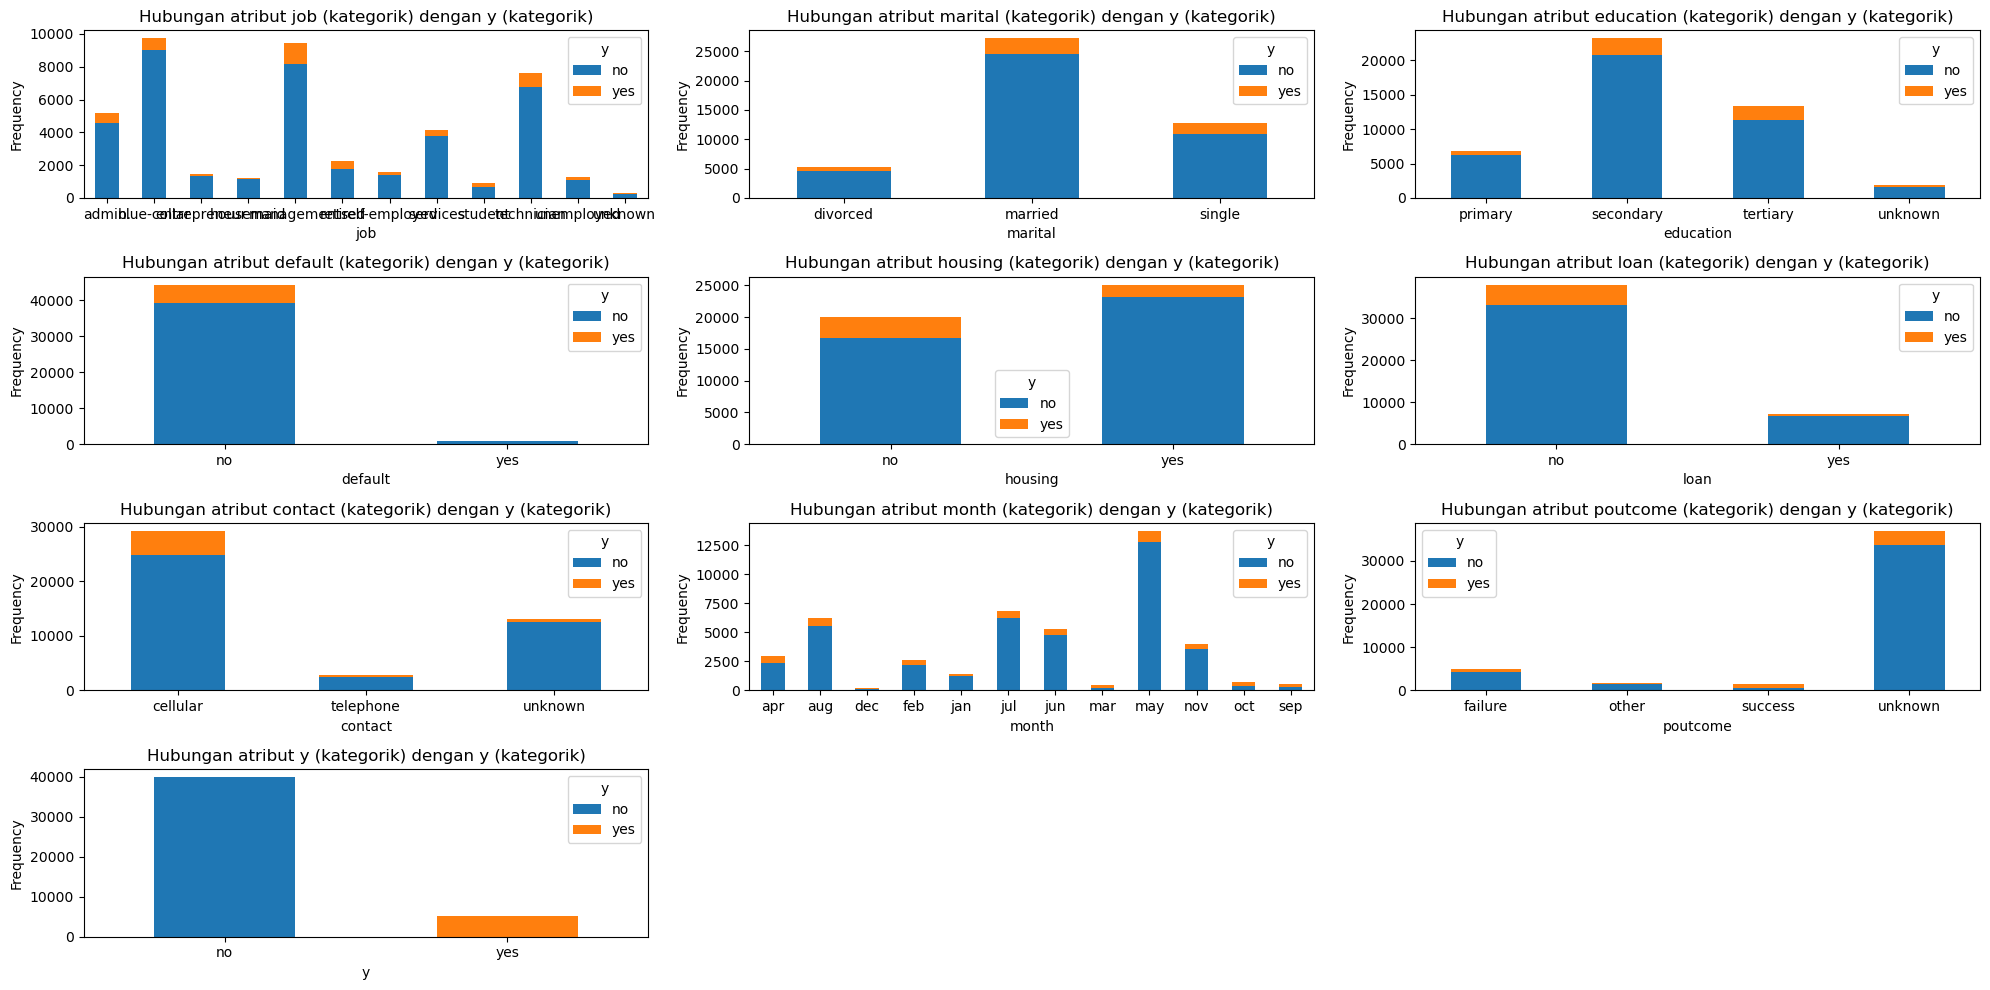

In [20]:
def f_bar_hubungan_atr_kat_tar_kat(dataframe, target):
    '''
    Fungsi ini bertujuan untuk memperlihatkan bar chart dari hubungan atribut kategorik dengan target kategorik

    Input: dataframe, nama atribut yang dijadikan sebagai target
    Output: Bar chart dari atribut kategorik

    '''
    # Membuat list nama atribut kategorik
    column_names = [i for i in dataframe if dataframe[i].dtype == 'O']
    # Mengatur jumlah figure salam kolom
    row = math.ceil(len(column_names)/3)
    # Membuat subplot
    fig, axes = plt.subplots(row, 3, figsize=(20, 10))
    axes = axes.flatten()
    # Menggunakan looping untuk membuat figure dari masing-masing figure
    for index, column_name in enumerate(column_names):
        contingency = pd.crosstab(dataframe[column_name], dataframe[target])
        contingency.plot(kind='bar', stacked=True, ax=axes[index])
        axes[index].set_title(f'Hubungan atribut {column_name} (kategorik) dengan {target} (kategorik)')
        axes[index].set_xlabel(column_name)
        axes[index].set_ylabel('Frequency')
        axes[index].tick_params(axis='x', rotation=0)
    # Menghilangkan figure yang tidak digunakan
    for i in range(len(column_names), len(axes)):
        fig.delaxes(axes[i])
    # Mengembalikkan figure
    return fig, axes

# Menggunakan fungsi f_bar_hubungan_atr_kat_tar_kat untuk memperlihatkan bar chart dari hubungan atribut kategorik dengan target kategorik
fig, ax = f_bar_hubungan_atr_kat_tar_kat(df_1, 'y')
plt.tight_layout()
plt.show()


Berdasarkan informasi dan visual di atas, semua atribut memiliki p_value hasil tes Chi-squared dengan nilai di bawah 0.05 dimana semua atribut kategorik memiliki hubungan yang non-random dengan atribut y sebagai atribut target.

### 2. Mengecek hubungan atribut numerik dengan target kategorik

Bagian ini bertujuan untuk mengetahui hubungan atribut numerik dengan atribut y sebagai atribut target (kategorik) dengan cara:
1. Mengelompokkan data-data dari atribut numerik berdasarkan masing-masing kelompok pada atribut target. Contoh, data-data age dikelompokkan berdasarkan data unik pada atribut y menjadi 2 kelompok, bernama 'yes' dan 'no'.
2. Lalu, nilai dari target dihitung rata-ratanya untuk masing-masing kelompok.
3. Kemudian, nilai rata-rata ini pada satu kelompok dibandingkan dengan kelompok lainnya menggunakan analisis statistik metode Independent Samples t-test, One-Way ANOVA test, atau Kruskal Wallis test.
4. Jika hasil analisis tersebut mengatakan bahwa nilai rata-rata pada masing-masing kelompok berbeda secara signifikan dengan kelompok lainnya, maka diasumsikan atribut age memiliki hubungan sebab-akibat dengan atribut y sebagai target.
5. Proses ini dilakukan untuk masing-masing atribut numerik.

Ketentuan jenis tes yang digunakan:
* Jika jumlah data unik yang dimiliki oleh atribut target kategorik adalah dua, maka dilakukan metode Independent Samples t-test.
* Jika jumlah data unik yang dimiliki oleh atribut target kategorik adalah lebih dari dua dan data memiliki distribusi normal, maka dilakukan metode One-Way ANOVA test.
* Jika jumlah data unik yang dimiliki oleh atribut target kategorik adalah lebih dari dua dan data memiliki distribusi non-normal, maka dilakukan metode Kruskal Wallis test.
* Perhitungan kondisi kenormalan distribusi data menggunakan uji test Kolmogorov-Smirnov sama seperti poin sebelumnya.

Semua tes memiliki:
* Hipotesis null : μ nilai target feature tidak berbeda secara signifikan di semua kelompok
* Hipotesis alternative : μ nilai target feature berbeda secara signifikan di semua kelompok
* Jika nilai p-value hasil dari tes berada di bawah 0.05 (Confidence level 95%) maka hipotesis null ditolak dimana atribut numerik memiliki hubungan dengan atribut y sebagai target.

In [21]:
def f_hubungan_atr_num_tar_kat(dataframe, target):
    '''
    # Fungsi ini bertujuan untuk menjelaskan hubungan atribut kategorik dengan target feature continuous. Hubungan dijelaskan dengan menggunakan tes Independent Samples t-test, One-Way ANOVA test, atau Kruskal Wallis test.

    # Input: dataframe, target feature
    # Output: Informasi nama_kolom_1, jumlah_data_unik_kolom_1, target_feature, normality_target_feature, jenis tes, p_value,
    # rata_rata_target yang dimiliki oleh dataframe

    '''
    # Mempersiapkan list kosong yang nantinya akan diisi oleh informasi korelasi
    nama_atribut = []
    jumlah_data_unik_target = []
    normality_atribut = []
    jenis_tes = []
    p_value = []
    # Melakukan looping berdasarkan nama kolom
    for column_name in dataframe:
        # Menfilter atribut bertipe string
        if dataframe[column_name].dtype != 'O':
            # Memasukkan nama atribut ke dalam list
            nama_atribut.append(column_name)
            # Menfilter atribut yang memiliki unik data kurang dari tiga
            data_unik = len(dataframe[target].unique())
            jumlah_data_unik_target.append(data_unik)
            if data_unik < 3:
                normality_atribut.append('tidak_perlu_dihitung')
                # Memasukkan jenis tes yang digunakan ke dalam list
                jenis_tes.append('Independent Samples t-test')
                # Melakukan tes dan memasukkan hasilnya ke dalam list
                p_value_t_test = stats.ttest_ind(dataframe[dataframe[target] == dataframe[target].unique()[0]][column_name],
                                                dataframe[dataframe[target] == dataframe[target].unique()[1]][column_name])[1]
                p_value.append(p_value_t_test)
            else:
                # Menghitung normality atribut target
                ks_stat, p_value_normal = kstest(dataframe[column_name], 'norm')
                # Mengelompokkan data atribut target berdasarkan unik data
                kelompok_data = [kelompok[column_name].values for i, kelompok in dataframe.groupby(target)]
                # Conditional jika atribut target normal
                if p_value_normal>0.05:
                    normality_atribut.append('normal')
                    # Memasukkan jenis tes yang digunakan ke dalam list
                    jenis_tes.append('One-Way ANOVA')
                    # Melakukan tes dan memasukkan hasilnya ke dalam list
                    p_value_anova = stats.f_oneway(*kelompok_data)[1]
                    p_value.append(p_value_anova)
                else:
                    normality_atribut.append('non-normal')
                    # Memasukkan jenis tes yang digunakan ke dalam list
                    jenis_tes.append('Kruskal Wallis test')
                    # Melakukan tes dan memasukkan hasilnya ke dalam list
                    p_value_kruskal = stats.kruskal(*kelompok_data)[1]
                    p_value.append(p_value_kruskal)
        else: continue

    # Membuat dataframe berdasarkan list
    data = {'nama_atribut': nama_atribut,
            'nama_target': [target]*len(nama_atribut),
            'jumlah_data_unik_target': jumlah_data_unik_target,
            'normality_atribut': normality_atribut,
            'jenis_tes': jenis_tes,
            'p_value': [round(i, 9) for i in p_value]        
            }
    df_temp = pd.DataFrame(data)
    # Membuat atribut baru berdasarkan apakah ada perbedaan atau tidak
    df_temp['analisa_p_value'] = df_temp['p_value'].apply(lambda x: 'rata-rata atribut berbeda di antara kelompok target'
                                              if x < 0.05 else 'rata-rata atribut tidak berbeda di antara kelompok target')
    df_temp['keterangan'] = df_temp['p_value'].apply(lambda x: 'atribut dan target memiliki hubungan'
                                              if x < 0.05 else 'atribut dan target tidak ada hubungan')
    return df_temp

In [22]:
# Memanggil fungsi f_hubungan_kategorik mengecek hubungan atribut kategorik dengan target
df_temp = f_hubungan_atr_num_tar_kat(df_1, 'y')
# Memperlihatkan data
df_temp.drop(columns=['normality_atribut'])

,nama_atribut,nama_target,jumlah_data_unik_target,jenis_tes,p_value,analisa_p_value,keterangan
0,age,y,2,Independent Samples t-test,8.800000e-08,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
1,balance,y,2,Independent Samples t-test,0.000000e+00,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
2,day,y,2,Independent Samples t-test,2.000000e-09,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
3,duration,y,2,Independent Samples t-test,0.000000e+00,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
4,campaign,y,2,Independent Samples t-test,0.000000e+00,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
5,pdays,y,2,Independent Samples t-test,0.000000e+00,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
6,previous,y,2,Independent Samples t-test,0.000000e+00,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan


In [23]:
def f_boxplot_hubungan_atr_num_tar_kat(dataframe, target, fig_per_row = 3, hor_size = 20, ver_size = 10):
    '''
    Fungsi ini bertujuan untuk memperlihatkan boxplot tentang hubungan atribut numerik dengan atribut kategorik sebagai target

    Input: dataframe, nama atribut yang yang dijadikan sebagai target
           fig_per_row : Pengaturan jumlah figure dalam baris
           hor_size : Ukuran horizontal figure
           ver_size : Ukuran vertikal figure
    Output: boxplot tentang hubungan atribut numerik dengan atribut kategorik sebagai target

    '''
    # Membuat list berisi atribut bertipe object
    column_names = [i for i in dataframe if dataframe[i].dtype != 'O']

    # Membuat box plot
    row = math.ceil(len(column_names)/fig_per_row)
    fig, axes = plt.subplots(row, fig_per_row, figsize=(hor_size, ver_size))
    axes = axes.flatten()

    # Mengatur box plot
    for index, column_name in enumerate(column_names):
        sns.boxplot(x=target, y=column_name, data=dataframe, ax=axes[index])
        axes[index].set_title(f'{column_name} dikelompokkan berdasarkan {target}')
        axes[index].set_xlabel(target)
        axes[index].set_ylabel(column_name)
    # Menghilangkan figure yang tidak digunakan
    for i in range(len(column_names), len(axes)):
        fig.delaxes(axes[i])
    
    # Mengembalikkan figure
    return fig, axes

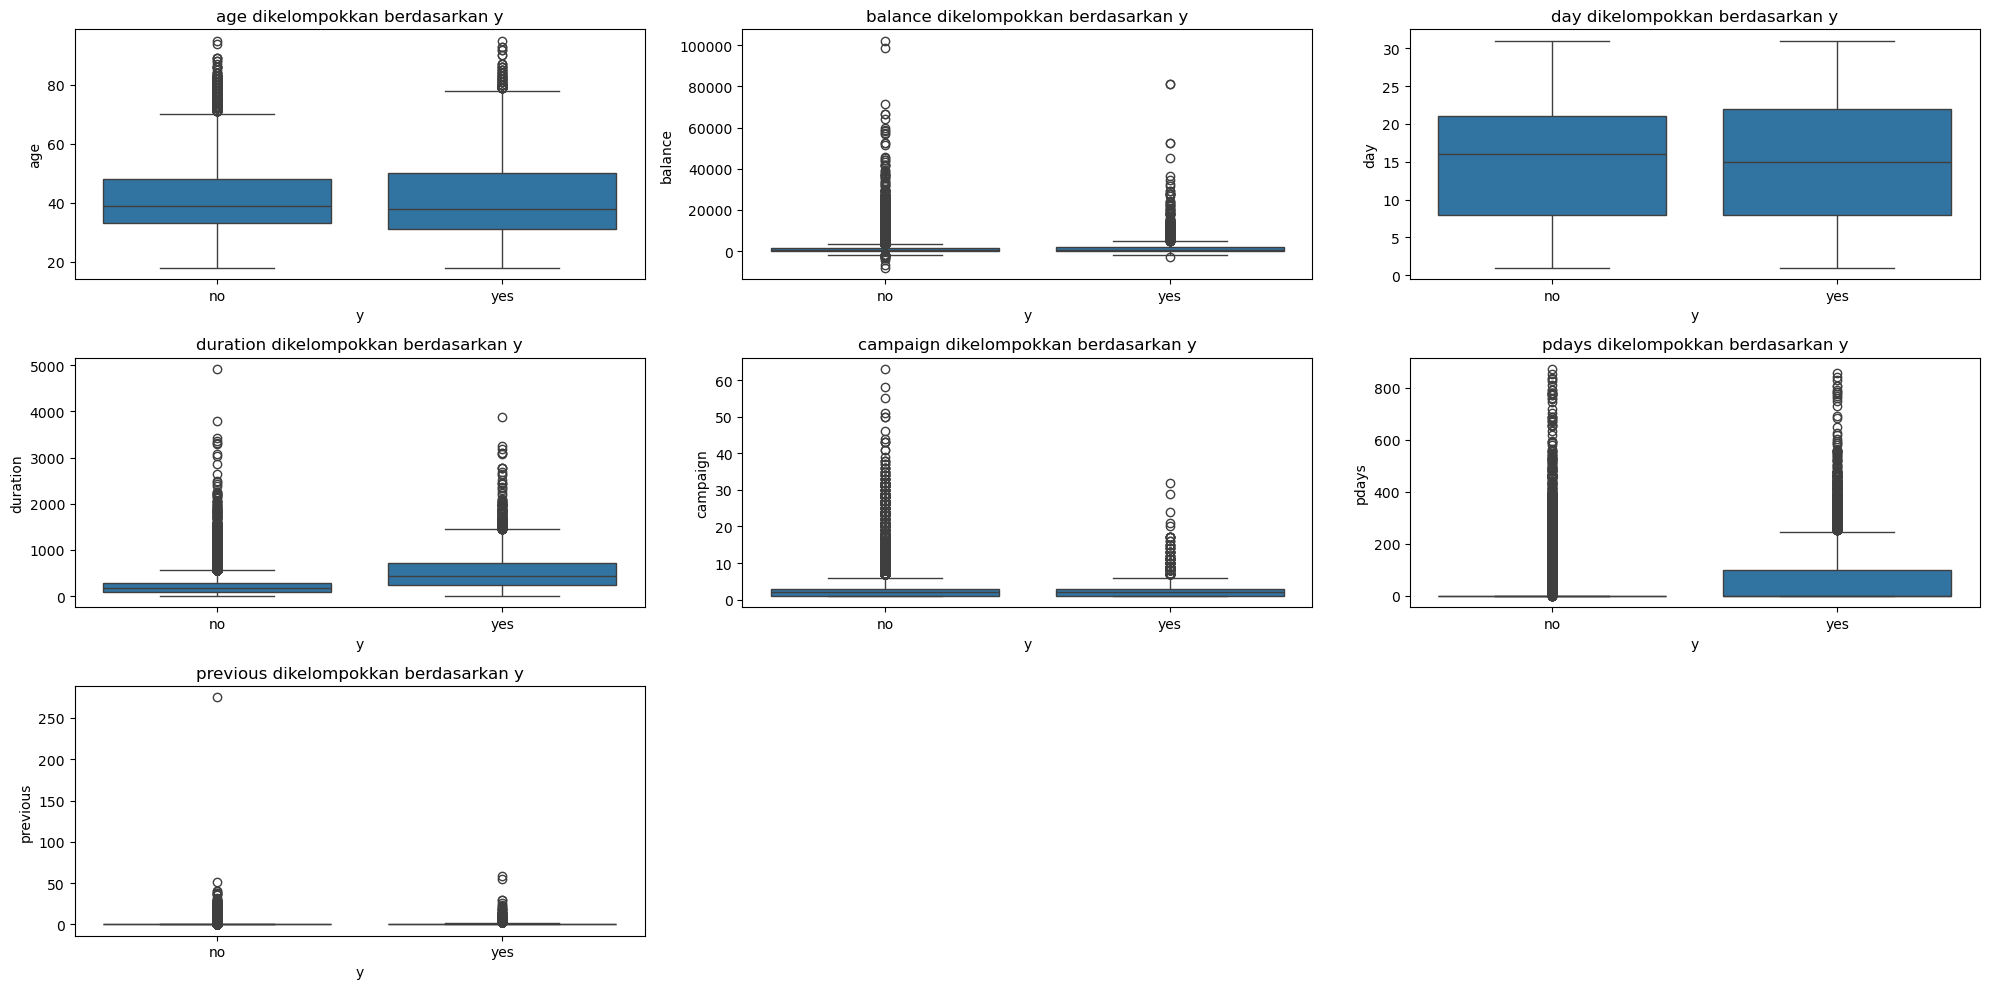

In [24]:
# Menggunakan fungsi untuk memperlihatkan boxplot tentang hubungan atribut numerik dengan atribut kategorik sebagai target
fig, ax = f_boxplot_hubungan_atr_num_tar_kat(df_1, 'y', hor_size = 20, ver_size = 10)
plt.tight_layout()
plt.show()

Berdasarkan informasi dan visual di atas, semua atribut memiliki p_value hasil tes dengan nilai di bawah 0.05. Semua atribut numerik memiliki hubungan non-random dengan atribut y sebagai atribut target dimana nilai rata-rata atribut berbeda di antara kelompok y.

## **G. Hubungan antar atribut non target**

Terdapat beberapa metode pemodelan yang sensitif terhadap kondisi multicollinearitas pada data. Kondisi ini terjadi jika terdapat suatu atribut non-target memiliki nilai yang bersifat non-random dengan atribut non-target lainnya dimana kedua atribut ini saling berhubungan. Menggunakan metode yang tidak sesuai dengan kondisi data dapat menghasilkan performa model yang rendah. Maka dari itu, kondisi ini perlu dicek.

### 1. Mengecek hubungan antar atribut kategorik

Bagian ini bertujuan untuk melihat hubungan antar atribut kategorik menggunakan metode Chi-Square Test seperti yang sudah dijelaskan sebelumnya. 

In [25]:
# Membuat list berisi kolom numerik dan kolom kategorik tanpa ada target
df_temp = df_1.drop('y', axis = 1)
kolom_kategorik = [i for i in df_temp.columns if df_temp[i].dtype == 'O']
kolom_numerik = [i for i in df_temp.columns if df_temp[i].dtype != 'O']
print('List kolom kategorik adalah:', kolom_kategorik)
print('List kolom numerik adalah:', kolom_numerik)

List kolom kategorik adalah: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
List kolom numerik adalah: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [26]:
# Melakukan looping untuk menggunakan fungsi f_hubungan_atr_kat_tar_kat dengan atribut kategorik
df_temp_1 = df_1.copy()
df_temp_final = pd.DataFrame()
kolom_tidak_digunakan = []
for i in kolom_kategorik:
    df_temp_2 = f_hubungan_atr_kat_tar_kat(df_temp_1[[j for j in kolom_kategorik if j not in kolom_tidak_digunakan]], i)
    df_temp_final = pd.concat([df_temp_final, df_temp_2], ignore_index=True)
    kolom_tidak_digunakan.append(i)

df_temp_final.sort_values('p_value')

,nama_atribut,nama_target,jenis_tes,p_value,keterangan
0,marital,job,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan
33,month,contact,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan
31,month,loan,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan
28,month,housing,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan
27,contact,housing,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan
19,month,education,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan
34,poutcome,contact,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan
35,poutcome,month,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan
1,education,job,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan
3,housing,job,Chi-Square Test,0.000000e+00,atribut dan target memiliki hubungan


In [27]:
# Memperlihatkan data
df_temp_final['keterangan'].value_counts()

keterangan
atribut dan target memiliki hubungan     35
atribut dan target tidak ada hubungan     1
Name: count, dtype: int64

Berdasarkan informasi di atas, semua atribut kategorik memiliki hubungan non-random dengan atribut kategorik lainnya.

### 2. Mengecek hubungan antar atribut numerik

Bagian ini bertujuan untuk melihat hubungan antar atribut numerik menggunakan metode spearman. Metode ini digunakan karena data memiliki distribusi tidak normal.

In [28]:
def f_hubungan_atribut_numerik(dataframe, method, horsize = 20, versize = 6):
    '''
    Fungsi ini bertujuan untuk membuat matrix korelasi untuk atribut numerik

    Input: dataframe, metode korelasi, ukuran figure
    Output: Matrix korelasi untuk atribut numerik

    '''
    # Membuat dataframe yang hanya berisi atribut numerik
    dataframe = dataframe[[i for i in dataframe.columns if dataframe[i].dtype != 'O']]
    # Perhitungan korelasi
    spearman_corr = dataframe.corr(method=method)
    # Pengaturan warna
    red_green_cmap = LinearSegmentedColormap.from_list('red_green_red', ['#f54242', '#f5f242', '#90ee90', '#f5f242', '#f54242'])
    mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

    # Pembuatan figure
    plt.figure(figsize=(horsize, versize))
    heatmap = sns.heatmap(spearman_corr,
                annot=True,
                cmap=red_green_cmap,
                linewidths=0.5,
                mask=mask,
                vmin=-1,
                vmax=1,
                cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1]})
    # Pengaturan colorbar
    colorbar = heatmap.collections[0].colorbar
    colorbar.ax.set_yticklabels(['-1', '-0.5', '0', '0.5', '1'])
    colorbar.ax.set_title('Correlation Value', pad=10)
    
    # Pengaturan label
    plt.xlabel('Nama Atribut', fontsize=12)
    plt.ylabel('Nama Atribut', fontsize=12)
    plt.title(f'{method} Correlation Matrix antar Atribut Numerik')
    plt.show()

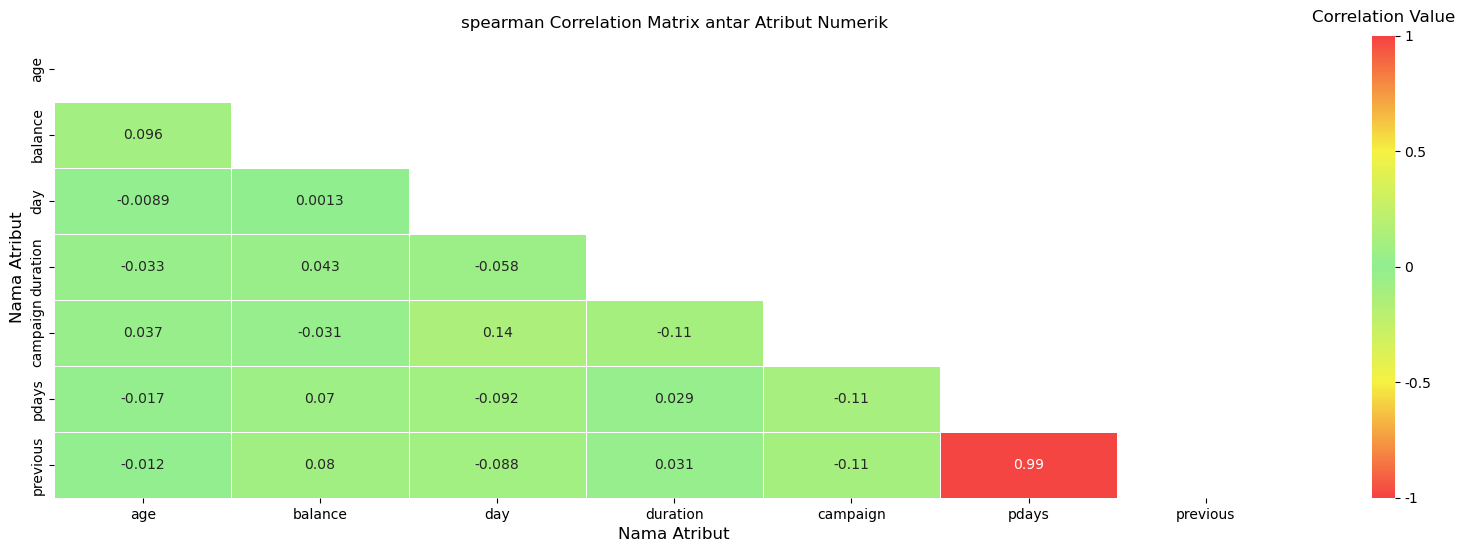

In [29]:
# Menggunakan f_hubungan_atribut_numerik untuk membuat matriks korelasi
df_temp = df_1.drop(columns=['y'])
f_hubungan_atribut_numerik(df_temp, 'spearman')

Berdasarkan visual di atas, atribut previous dan pdays memiliki nilai korelasi tinggi.

### 3. Mengecek hubungan antar atribut kategorik dan numerik

Bagian ini bertujuan untuk melihat hubungan beberapa atribut numerik dengan beberapa atribut kategorik menggunakan metode Independent Samples t-test, One-Way ANOVA test, atau Kruskal Wallis test seperti yang sudah dijelaskan sebelumnya. 

In [30]:
# Melakukan looping untuk menggunakan fungsi f_hubungan_atr_kat_tar_kat dengan atribut kategorik dan numerik
df_temp_1 = df_1.copy()
df_temp_final = pd.DataFrame()
for i in kolom_kategorik:
    df_temp_2 = f_hubungan_atr_num_tar_kat(df_temp_1, i)
    df_temp_final = pd.concat([df_temp_final, df_temp_2], ignore_index=True)

In [31]:
# Memperlihatkan data
df_temp_final

,nama_atribut,nama_target,jumlah_data_unik_target,normality_atribut,jenis_tes,p_value,analisa_p_value,keterangan
0,age,job,12,non-normal,Kruskal Wallis test,0.0,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
1,balance,job,12,non-normal,Kruskal Wallis test,0.0,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
2,day,job,12,non-normal,Kruskal Wallis test,0.0,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
3,duration,job,12,non-normal,Kruskal Wallis test,0.0,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
4,campaign,job,12,non-normal,Kruskal Wallis test,0.0,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
...,...,...,...,...,...,...,...,...
58,day,poutcome,4,non-normal,Kruskal Wallis test,0.0,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
59,duration,poutcome,4,non-normal,Kruskal Wallis test,0.0,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
60,campaign,poutcome,4,non-normal,Kruskal Wallis test,0.0,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan
61,pdays,poutcome,4,non-normal,Kruskal Wallis test,0.0,rata-rata atribut berbeda di antara kelompok target,atribut dan target memiliki hubungan


In [32]:
# Memperlihatkan data
df_temp_final['keterangan'].value_counts()

keterangan
atribut dan target memiliki hubungan     61
atribut dan target tidak ada hubungan     2
Name: count, dtype: int64

Berdasarkan informasi di atas, semua atribut kategorik dan atribut numerik memiliki hubungan non-random antara keduanya.

### 4. Kesimpulan

Berdasarkan penemuan pada poin ini, data memiliki kondisi multikolinearitas

## **H. Kesimpulan EDA**

Bagian ini bertujuan untuk menyimpulkan penemuan di bagian EDA

Kesimpulan:
* Large dataset with low dimensional data, data memiliki jumlah baris sebanyak 45211 dan jumlah atribut sebanyak 17.
* No Cardinality, data tidak memiliki jumlah data unik yang terlalu banyak
* Imbalanced data, atribut y yang merupakan target memiliki proporsi nilai yang tidak seimbang dimana perbandingan kategori yes dan no adalah 88%:12%.
* Non-normal data distribution, distribusi dari data numerik bersifat tidak normal dimana tidak ada data yang simetris dan memiliki nilai kurtosis 3.
* Missing values:
    * Tidak terdapat missing values yang ditandai oleh None.
    * Terdapat beberapa atribut kategorik yang memiliki nilai unknown yang terindikasi sebagai missing values.
    * Terdapat beberapa atribut numerik yang memiliki nilai negatif yang terindikasi sebagai missing values.
* Terdapat banyak outlier pada data dengan persentase sebesar 18%.
* Semua atribut memiliki hubungan yang non-random dengan atribut y sebagai atribut target.
* Multicollinearity, terdapat hubungan non-random di antara atribut non-target.

# **v. Feature Engineering**

## **A. Split Dataset, train data and test data**

Bagian ini bertujuan untuk memisahkan baris data yang dimiliki menjadi data train dan data test. Data train digunakan saat melatih model dan data test digunakan untuk mengevaluasi model. Perbandingan jumlah data train dengan data test adalah 80 : 20.

Metode yang digunakan untuk split dataset adalah stratified sampling karena:
* Data bersifat imbalanced.
* Untuk menjaga proporsi kategori dari atribut target untuk train data dan test data sesuai dengan data original.
* Untuk menghindari bias pada pemodelan dan evaluasi.

In [33]:
# Memisahkan sementara data atribut (X) dengan target (y)
X_1 = df_1.drop('y', axis=1)
y_1 = df_1['y']

# Memisahkan data train dan data test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, stratify=y_1, random_state=42)
Xy_train_1 = pd.concat([X_train_1, y_train_1], axis=1)
Xy_test_1 = pd.concat([X_test_1, y_test_1], axis=1)

In [34]:
# Menampilkan keterangan ukuran data
print('Ukuran Train Data :', Xy_train_1.shape[0])
print('Proporsi Train Data :', round(Xy_train_1.shape[0]/len(df_1)*100, 2), '%')
print('Ukuran Test Size :', Xy_test_1.shape[0])
print('Proporsi Test Data :', round(Xy_test_1.shape[0]/len(df_1)*100, 2), '%')

Ukuran Train Data : 36168
Proporsi Train Data : 80.0 %
Ukuran Test Size : 9043
Proporsi Test Data : 20.0 %


In [35]:
# Melakukan pengujian metode splitting

# Menghitung jumlah dan persentase kategori dari atribut target di train data
jumlah_atr_target_train = [i for i in Xy_train_1['y'].value_counts()]
proporsi_atr_target_train = [round(bb/len(Xy_train_1)*100, 2) for bb in jumlah_atr_target_train]
print('Pada data train, atribut y memiliki data dengan:')
for i, j in enumerate(Xy_train_1['y'].unique()):
    print('* Kategori', j, ':', 'berjumlah', jumlah_atr_target_train[i], 'dengan proporsi', proporsi_atr_target_train[i], '%')

print('')

# Menghitung jumlah dan persentase kategori dari atribut target di test data
jumlah_atr_target_test = [i for i in Xy_test_1['y'].value_counts()]
proporsi_atr_target_test = [round(bb/len(Xy_test_1)*100, 2) for bb in jumlah_atr_target_test]
print('Pada data test, atribut y memiliki data dengan:')
for i, j in enumerate(Xy_test_1['y'].unique()):
    print('* Kategori', j, ':', 'berjumlah', jumlah_atr_target_test[i], 'dengan proporsi', proporsi_atr_target_test[i], '%')

Pada data train, atribut y memiliki data dengan:
* Kategori no : berjumlah 31937 dengan proporsi 88.3 %
* Kategori yes : berjumlah 4231 dengan proporsi 11.7 %

Pada data test, atribut y memiliki data dengan:
* Kategori no : berjumlah 7985 dengan proporsi 88.3 %
* Kategori yes : berjumlah 1058 dengan proporsi 11.7 %


Berdasarkan informasi di atas,
* Perbandingan jumlah data pada data train dan data tes adalah 80%:20%
* Perbandingan jumlah kategori yes dan no pada atribut y sebagai target pada data train dan data test adalah sama, yakni 88.3%:11.7%

Maka dari itu, proses pemisahan data train dan data test berhasil.

## **B. Cardinality**

Bagian ini bertujuan untuk mengecek kondisi cardinality data.

In [36]:
# Memanggil fungsi f_data_unik_kategorik untuk melihat jumlah dan persentase data unik
df_temp = f_data_unik_kategorik(Xy_train_1)
# Menyetel ukuran dataframe yang diperlihatkan
pd.set_option('max_colwidth', None)
# Memperlihatkan dataframe
df_temp

,nama_kolom,jumlah_data_unik,data_unik
0,job,12.0,"technician, student, unemployed, blue-collar, management, services, admin., retired, unknown, entrepreneur, housemaid, self-employed"
1,marital,3.0,"divorced, single, married"
2,education,4.0,"secondary, tertiary, primary, unknown"
3,default,2.0,"no, yes"
4,housing,2.0,"no, yes"
5,loan,2.0,"no, yes"
6,contact,3.0,"telephone, cellular, unknown"
7,month,12.0,"aug, apr, jul, feb, jun, may, nov, mar, oct, jan, sep, dec"
8,poutcome,4.0,"unknown, failure, other, success"
9,y,2.0,"no, yes"


Berdasarkan informasi di atas, sesuai dengan hasil sebelumnya, tidak ada atribut yang memiliki tingkatan cardinality yang tinggi yang perlu ditangani.

## **C. Missing Values**

Bagian ini bertujuan untuk mengecek dan menangani kondisi missing values.

### a. Mengecek missing values yang ditandai dengan None

In [37]:
# Memperlihatkan informasi general dari dataframe
Xy_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 24001 to 44229
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.0+ MB


Berdasarkan informasi di atas, sesuai dengan hasil sebelumnya, tidak ada data missing values yang ditandai oleh None.

### b. Mengecek missing values yang tidak ditandai dengan None pada atribut kategorik

In [38]:
# Memanggil fungsi f_data_unik_kategorik untuk melihat jumlah dan persentase data unik
df_temp = f_data_unik_kategorik(Xy_train_1)
# Menyetel ukuran dataframe yang diperlihatkan
pd.set_option('max_colwidth', None)
# Memperlihatkan dataframe
df_temp

,nama_kolom,jumlah_data_unik,data_unik
0,job,12.0,"technician, student, unemployed, blue-collar, management, services, admin., retired, unknown, entrepreneur, housemaid, self-employed"
1,marital,3.0,"divorced, single, married"
2,education,4.0,"secondary, tertiary, primary, unknown"
3,default,2.0,"no, yes"
4,housing,2.0,"no, yes"
5,loan,2.0,"no, yes"
6,contact,3.0,"telephone, cellular, unknown"
7,month,12.0,"aug, apr, jul, feb, jun, may, nov, mar, oct, jan, sep, dec"
8,poutcome,4.0,"unknown, failure, other, success"
9,y,2.0,"no, yes"


Berdasarkan informasi di atas, terdapat beberapa atribut yang memiliki data terindikasi sebagai missing values, diantaranya adalah:
* Atribut job memiliki nilai unknown
* Atribut education memiliki nilai unknown
* Atribut contact memiliki nilai unknown
* Atribut poutcome memiliki nilai unknown

### c. Mengecek missing values yang tidak ditandai dengan None pada atribut numerik

In [39]:
# Menggunakan f_min_max_numerik untuk melihat nilai makimum dan minimum tiap atribut
df_temp = f_min_max_numerik(Xy_train_1)
df_temp

,nama_kolom,min,max
0,age,18.0,95.0
0,balance,-8019.0,102127.0
0,day,1.0,31.0
0,duration,0.0,4918.0
0,campaign,1.0,63.0
0,pdays,-1.0,871.0
0,previous,0.0,275.0


In [40]:
# Memperlihatkan atribut balance dengan nilai negatif
Xy_train_1[Xy_train_1['balance']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30424,46,services,married,tertiary,no,-780,no,yes,cellular,5,feb,128,1,-1,0,unknown,no
2126,25,services,single,secondary,no,-439,yes,no,unknown,12,may,293,1,-1,0,unknown,no
37346,44,management,single,secondary,no,-228,yes,yes,cellular,13,may,38,1,362,2,failure,no
7428,29,blue-collar,single,secondary,no,-125,yes,no,unknown,29,may,198,3,-1,0,unknown,no
8309,41,admin.,married,secondary,no,-18,yes,yes,unknown,2,jun,83,6,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17320,43,management,married,tertiary,no,-391,yes,no,cellular,28,jul,193,8,-1,0,unknown,no
2397,47,retired,married,primary,yes,-13,no,no,unknown,13,may,295,1,-1,0,unknown,no
20163,39,technician,married,tertiary,no,-276,no,yes,cellular,11,aug,121,4,-1,0,unknown,no
10002,35,services,married,secondary,no,-489,yes,no,unknown,9,jun,90,2,-1,0,unknown,no


In [41]:
# Memperlihatkan nilai dari atribut loan ketika atribut balance bernilai negatif
Xy_train_1[Xy_train_1['balance']<0]['loan'].value_counts()

loan
no     2009
yes     992
Name: count, dtype: int64

In [42]:
# Memperlihatkan atribut pdays dengan nilai negatif
Xy_train_1[Xy_train_1['pdays']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24001,36,technician,divorced,secondary,no,861,no,no,telephone,29,aug,140,2,-1,0,unknown,no
20669,44,technician,single,secondary,no,244,yes,no,cellular,12,aug,1735,4,-1,0,unknown,yes
18810,48,unemployed,married,secondary,no,0,no,no,telephone,31,jul,35,11,-1,0,unknown,no
23130,38,technician,married,secondary,no,257,no,no,cellular,26,aug,57,10,-1,0,unknown,no
15058,48,blue-collar,married,secondary,no,1513,no,yes,cellular,17,jul,1171,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,41,management,single,tertiary,no,1113,yes,yes,unknown,9,jun,388,12,-1,0,unknown,no
17958,50,blue-collar,married,secondary,no,917,yes,no,cellular,30,jul,58,2,-1,0,unknown,no
15941,36,admin.,single,secondary,no,22,yes,no,cellular,22,jul,77,5,-1,0,unknown,no
16952,45,blue-collar,married,secondary,no,79,yes,no,cellular,25,jul,98,1,-1,0,unknown,no


In [43]:
# Memperlihatkan nilai dari atribut previous ketika atribut pdays bernilai negatif
Xy_train_1[Xy_train_1['pdays']<0]['previous'].value_counts()

previous
0    29584
Name: count, dtype: int64

Berdasarkan informasi di atas, atribut balance dan pdays memiliki nilai aneh dimana memiliki nilai negatif dimana mengindikasi ada missing values pada kedua atribut ini.

### d. Mengetahui maksud dari nilai unknown dari job, education, contact, dan poutcome.

Berdasarkan dari sumber data, jika terdapat nilai 'Unknown' pada atribut kategorik seperti job, education, contact, dan poutcome, tim marketing gagal untuk mendapatkan suatu informasi dari customer. Artinya, keadaan 'Unknown' pada data sudah diketahui oleh pemilik data dan bukan muncul karena ketidak sengajaan.

Sumber:

https://www.kaggle.com/datasets/psvishnu/bank-direct-marketing

### e. Mengecek feature importance dari nilai unknown dari job, education, contact, dan poutcome

In [44]:
# Membuat feature importance untuk dataset

# Membuat list berisikan nama kolom kategorik dan numerik
kolom_kategorik = [i for i in X_train_1.columns if X_train_1[i].dtype == 'O']
kolom_numerik = [i for i in X_train_1.columns if X_train_1[i].dtype != 'O']

# Membuat pipeline untuk input data kategorik dan numerik, dengan model RandomForestClassifier
preprocessor = ColumnTransformer([('num', StandardScaler(), kolom_numerik),
                                  ('cat', OneHotEncoder(), kolom_kategorik)])
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))

# Melatih model pipeline
rf_pipeline.fit(X_train_1, y_train_1)

# Membuat feature importance
rf_model = rf_pipeline.named_steps['randomforestclassifier']
kategori = rf_pipeline.named_steps['columntransformer'].named_transformers_['cat']
feature_names = kolom_numerik + list(kategori.get_feature_names_out(kolom_kategorik))
importances = rf_model.feature_importances_

# Memasukkan feature importance ke dalam list dan memperlihatkannya
feature_importances = pd.DataFrame({'Feature': feature_names,
                                    'Importance': importances})
feature_importances[(feature_importances['Feature']=='job_unknown') |
                    (feature_importances['Feature']=='education_unknown') |
                    (feature_importances['Feature']=='contact_unknown') |
                    (feature_importances['Feature']=='poutcome_unknown')]

,Feature,Importance
18,job_unknown,0.001132
25,education_unknown,0.005399
34,contact_unknown,0.007728
50,poutcome_unknown,0.008996


Berdasarkan poin sebelumnya nilai Unknown pada atribut job, education, contact, dan poutcome bukan merupakan hasil dari kesengajaan. Namun, berdasarkan hasil dari feature importance, nilai dari atribut ini memiliki pengaruh yang sangat kecil terhadap model. Maka dari itu, untuk meringankan kerja model, nilai Unknown bisa dianggap sebagai missing value dan bisa ditangani/diganti dengan value lain.

### f. Mengetahui maksud dari nilai negatif dari atribut balance dan pdays.

In [45]:
# Memperlihatkan nilai dari atribut loan ketika atribut balance bernilai negatif
Xy_train_1[Xy_train_1['balance']<0]['loan'].value_counts()

loan
no     2009
yes     992
Name: count, dtype: int64

Berdasarkan dari sumber data,
* Untuk atribut balance, sumber data tidak memberikan informasi mengenai nilai negatif ini.
    * Jika diasumsikan nilai negatif pada balance merupakan suatu hutang yang perlu dibayarkan, maka customer ini pernah memiliki loan (pinjaman) dan atribut loan akan bernilai yes. Namun, berdasarkan informasi di atas, ketika atribut balance bernilai negatif, kebanyakan nilai dari atribut loan adalah no. Maka dari itu asumsi ini adalah salah.
* Ketika atribut pdays bernilai -1, maka customer tersebut belum pernah dilakukan komunikasi marketing. Maka dari itu, atribut pdays dengan nilai negatif tidak bisa dikategorikan sebagai missing values.

Sumber:

https://www.kaggle.com/datasets/psvishnu/bank-direct-marketing

### g. Identifikasi jenis missing values

Berdasarkan penemuan sebelumnya, atribut yang memiliki missing value adalah atribut job, education, contact, dan poutcome dengan nilai Unknown. Dikarenakan tidak adanya unsur ketidak-sengajaan dari missing value ini, maka dapat disimpulkan bahwa ini jenis missing value adalah Missing Not at Random (MNAR).

### h. Handling missing values

Hal yang pertama yang perlu dilakukan adalah dengan mendefinisikan bahwa nilai Unknown adalah Missing Value.

In [46]:
# Meng-copy data train dan test
X_train_2 = X_train_1.copy()
y_train_2 = y_train_1.copy()
X_test_2 = X_test_1.copy()
y_test_2 = y_test_1.copy()

# Mengubah nilai unknown pada data menjadi missing values
X_train_2.replace('unknown', None, inplace=True)
X_test_2.replace('unknown', None, inplace=True)

Lalu, jenis handling yang akan dilakukan pada missing values adalah Imputation Median (pada atribut numerik) dan Imputation Mode (pada atribut kategorik) dengan alasan:
1. Jenis missing values berupa Missing Not at Random (MNAR).
2. Data yang digunakan berkaitan dengan keuangan yang bersifat sensitif.
3. Semua atribut numerik memiliki distribusi data yang tidak normal

Handling ini akan dimasukkan ke dalam pipeline pemodelan.

## **D. Outliers**

Bagian ini bertujuan untuk mengecek dan menangani outlier pada data.

### a. Mengecek outlier pada atribut kategorik

Untuk atribut kategorik, hal ini bisa dicek jika terdapat data unik yang memiliki kesamaan dengan data unik lainnya. Contoh, Bogor dengan Bogaa dimana Bogaa adalah outlier.

In [47]:
# Menggabungkan data X dan Y
Xy_train_2 = pd.concat([X_train_2, y_train_2], axis=1)
Xy_test_2 = pd.concat([X_test_2, y_test_2], axis=1)

In [48]:
# Memanggil fungsi f_data_unik_kategorik untuk mengecek outlier pada atribut kategorik
df_temp = f_data_unik_kategorik(Xy_train_2.dropna())
# Memperlihatkan dataframe
df_temp

,nama_kolom,jumlah_data_unik,data_unik
0,job,11.0,"student, management, admin., blue-collar, retired, unemployed, housemaid, services, technician, entrepreneur, self-employed"
1,marital,3.0,"single, married, divorced"
2,education,3.0,"secondary, primary, tertiary"
3,default,2.0,"no, yes"
4,housing,2.0,"no, yes"
5,loan,2.0,"no, yes"
6,contact,2.0,"cellular, telephone"
7,month,12.0,"apr, may, feb, aug, oct, nov, jul, mar, sep, jun, dec, jan"
8,poutcome,3.0,"failure, other, success"
9,y,2.0,"yes, no"


Berdasarkan informasi di atas, sesuai dengan sebelumnya, semua atribut tidak memiliki data unik yang hampir mirip dengan yang lainnya. Maka dari itu, dapat disimpulkan bahwa outlier tidak terdapat pada atribut kategorik.

### b. Mengecek outlier pada atribut numerik

In [49]:
# Menggunakan f_outlier_numerik utnuk melihat outlier pada data
df_temp = f_outlier_numerik(Xy_train_2.dropna())
df_temp

,nama_kolom,skewness,tes,batas_atas,batas_bawah,jumlah_outlier,persentase_outlier
0,age,0.988433,Tukeys Rule,69.500000,9.500000,154,2.46
1,balance,8.813141,Tukeys Rule,4147.000000,-2221.000000,597,9.55
2,day,0.284486,z score,37.866607,-9.422518,0,0.00
3,duration,2.493048,Tukeys Rule,636.750000,-201.250000,409,6.54
4,campaign,2.438801,Tukeys Rule,3.500000,-0.500000,800,12.80
5,pdays,0.502856,Tukeys Rule,618.000000,-158.000000,21,0.34
6,previous,28.773819,Tukeys Rule,8.500000,-3.500000,350,5.60


Berdasarkan informasi di atas, sesuai dengan sebelumnya, hampir semua atribut memiliki nilai yang dianggap sebagai outlier dimana atribut dengan data outlier terbanyak adalah atribut pdays dan previous dengan 18%.

### c. Membandingkan keberadaan outlier dengan domain knowledge

Outlier memiliki definisi data dengan nilai berbeda dengan yang lainnya. Namun, bukan berarti nilai yang berbeda ini merupakan hasil dari ketidak sengajaan. Maka dari itu, bagian ini bertujuan untuk mengecek apakah penpengecekan outlier sebelumnya logis atau tidak.

#### i. Meneliti outlier pada atribut age

In [50]:
# Memperlihatkan outlier pada atribut age
df_temp = Xy_train_2[(Xy_train_2['age']>70.5000) | (Xy_train_2['age']<10.500000)][['age', 'job']]
df_temp.sort_values('age', ascending=False).head(20)

,age,job
33699,95,retired
41663,95,retired
31233,94,retired
44262,93,retired
42727,92,retired
43194,90,retired
31069,90,retired
42574,89,retired
41162,89,retired
44892,89,retired


Berdasarkan informasi di atas,
* Customer dengan usia yang tinggi memiliki pekerjaan retired.
* Customer dengan usia tinggi memiliki umur sekitar harapan hidup (berdasarkan sumber di bawah), dengan nilai 83 tahun.

Dikarenakan kesesuaian ini, data-data terebut tidak dapat dikategorikan sebagai outlier.

Sumber:
https://www.macrotrends.net/global-metrics/countries/PRT/portugal/life-expectancy#:~:text=The%20life%20expectancy%20for%20Portugal%20in%202022%20was%2082.47,a%200.22%25%20increase%20from%202021.

#### ii. Meneliti outlier pada atribut balance

In [51]:
# Memperlihatkan outlier pada atribut balance
df_temp = Xy_train_2[(Xy_train_2['balance']>3464.6250) | (Xy_train_2['balance']<-1960.375000)][['balance', 'job']]
df_temp.sort_values('balance', ascending=False).head(20)

,balance,job
39989,102127,management
42558,81204,retired
43393,81204,retired
41693,71188,retired
19785,66721,management
21192,66653,blue-collar
19420,64343,admin.
41374,59649,entrepreneur
12926,58932,blue-collar
27390,57435,services


Berdasarkan informasi di atas,
* Terdapat customer dengan pekerjaan sebagai admin dengan gaji 64343 Euro per tahun. Kondisi ini tidak sesuai dengan sumber di bawah dimana maksimal gaji sebagai admin di portugal adalah 32000 Euro per tahun.
* Terdapat customer dengan pekerjaan sebagai housemaid dengan gaji 45141 Euro per tahun. Kondisi ini tidak sesuai dengan sumber di bawah dimana maksimal gaji sebagai housemaid di portugal adalah 16000 Euro per tahun.

Dikarenakan ketidaksesuaian ini, data-data terebut dapat dikategorikan sebagai outlier.

Sumber:
* https://www.payscale.com/research/PT/Job=Administrative_Assistant/Salary
* https://www.erieri.com/salary/job/maid/portugal#:~:text=Salary%20Recap,%E2%82%AC12%2C116%20and%20%E2%82%AC18%2C104.

#### iii. Meneliti outlier pada atribut duration

In [52]:
# Memperlihatkan outlier pada atribut duration
df_temp = Xy_train_2[(Xy_train_2['duration']>640.5000) | (Xy_train_2['duration']<-219.500000)][['duration']]
df_temp.sort_values('duration', ascending=False)

,duration
24148,4918
9947,3881
44602,3785
19639,3422
2386,3366
...,...
15438,641
11018,641
37314,641
19291,641


Berdasarkan poin sebelumnya, atribut balance menjelaskan lama hari saat melakukan komunikasi marketing yang sebelumnya dilakukan pada customer

Lalu, berdasarkan informasi di atas,
* Terdapat 2632 customer yang tidak dilakukan komunikasi marketing oleh perusahaan dengan lama minimal 641 hari atau sekitar 2 tahun. Kondisi ini tidak logis karena tidak mungkin ada bank yang tidak melakukan tawaran selama satu tahun lebih. Maka dari itu, data ini dapat dianggap sebagai outlier.

#### iv. Meneliti outlier pada atribut campaign

In [53]:
# Memperlihatkan outlier pada atribut campaign
df_temp = Xy_train_2[(Xy_train_2['campaign']>6) | (Xy_train_2['campaign']<-2)][['campaign', 'age', 'job']]
df_temp.sort_values('campaign', ascending=False).head(10)

,campaign,age,job
4330,63,45,management
11914,58,24,technician
4299,51,30,management
5459,50,35,blue-collar
18713,50,35,blue-collar
10697,46,28,blue-collar
18744,44,49,blue-collar
13675,43,51,blue-collar
18660,43,33,blue-collar
11301,41,28,blue-collar


Berdasarkan poin sebelumnya, atribut campaign menjelaskan total jumlah komunikasi marketing yang dilakukan pada customer untuk marketing campaign saat ini.

Berdasarkan data di atas,
* Terdapat beberapa customer yang mendapat panggilan telepon untuk marketing campaign sebanyak 50 kali. Namun, kebanyakan mereka berumur produktif (25-35 tahun) dan berkerja sebagai blue-collar. Tidak mungkin customer tersebut memiliki kesempatan untuk menerima panggilan telepon sebanyak 50 kali dari orang yang tidak dikenal dalam rentang waktu 3 bulan (berdasarkan sumber di bawah). Berdasarkan ketidaksesuaian ini, data ini bisa dianggap sebagai outlier.

Sumber:
https://www.wfsbadvertising.com/blog/what-is-the-length-of-a-successful-marketing-campaign#:~:text=A%20branding%20campaign%2C%20on%20average,the%20duration%20of%20those%20events.

#### v. Meneliti outlier pada atribut pdays dan previous

In [54]:
# Memperlihatkan outlier pada atribut pdays
df_temp = Xy_train_2[(Xy_train_2['pdays']>-2) | (Xy_train_2['pdays']<-1)][['pdays', 'previous']]
df_temp.sort_values('pdays', ascending=False).head(10)

,pdays,previous
45146,871,2
44829,854,2
44837,850,2
44858,842,1
44698,831,1
44530,828,2
45024,826,1
45120,805,4
45037,804,1
44260,792,3


In [55]:
# Memperlihatkan nilai previous ketika pdays bernilai negatif
Xy_train_2[(Xy_train_2['pdays'] == -1)]['previous'].value_counts()

previous
0    29584
Name: count, dtype: int64

In [56]:
# Memperlihatkan nilai previous ketika pdays bukan bernilai negatif
Xy_train_2[(Xy_train_2['pdays'] != -1)]['previous'].value_counts()

previous
1      2232
2      1681
3       881
4       563
5       368
6       228
7       157
8       107
9        71
10       56
11       54
13       34
12       34
14       16
15       13
17       12
16       11
19        8
20        7
18        6
23        5
22        5
21        4
24        4
30        3
25        3
29        3
27        3
38        2
28        2
26        2
40        1
35        1
32        1
51        1
37        1
55        1
275       1
58        1
41        1
Name: count, dtype: int64

Berdasarkan sumber data,
* Atribut pdays menjelaskan jumlah hari dari waktu terakhir customer dilakukan komunikasi marketing untuk marketing campaign sebelumnya hingga marketing campaign saat ini. Jika nilainya -1, maka customer tersebut belum pernah dilakukan komunikasi marketing
* Atribut previous menjelaskan total jumlah komunikasi marketing yang dilakukan pada customer untuk marketing campaign sebelumnya

Berdasarkan informasi di atas,
* Data pada atribut pdays dianggap sebagai outlier ketika memiliki nilai bukan -1. Ketika atribut pdays bernilai -1, atribut pdays bernilai 0. Lalu, ketika atribut pdays bukan bernilai -1, atribut pdays bukan bernilai 0.

Karena kesesuaian nilai pada data dengan deskripsi dari data, maka data ini tidak bisa dianggap sebagai outlier.

#### vi. Kesimpulan penelitian outlier

Berdasarkan penelitian sebelumnya, dapat disimpulkan bahwa:
* Atribut balance, duration dan campaign bisa dianggap sebagai outlier.
* Atribut age, pdays dan previous tidak bisa dianggap sebagai outlier.

### d. Menghitung jumlah data yang dianggap sebagai outlier

In [57]:
# Membuat daftar baris yang cellnya memiliki outlier
jumlah = Xy_train_2[(Xy_train_2['balance']>3464.6250) |
                    (Xy_train_2['balance']<-1960.375000) |
                    (Xy_train_2['duration']>640.5000) |
                    (Xy_train_2['duration']<-219.500000) |
                    (Xy_train_2['campaign']>6) |
                    (Xy_train_2['campaign']<-2)].shape[0]
# Menghitung persentase
persentase = round(jumlah/Xy_train_2.shape[0]*100, 2)

print('Jumlah baris data yang dianggap sebagai outlier berjumlah', jumlah, 'atau', persentase, '% dari seluruh data train')

Jumlah baris data yang dianggap sebagai outlier berjumlah 8161 atau 22.56 % dari seluruh data train


Dari informasi di atas, jumlah baris data yang dianggap sebagai outlier berjumlah 8161 atau 22.56 % dari seluruh data train

### e. Handling outlier

Bagian ini bertujuan untuk melakukan penanganan pada data, khususnya pada atribut balance, duration, dan campaign. Penanganan yang dilakukan adalah dengan menggunakan metode Winsorization dengan capping_method='iqr', karena:
* Jumlah baris data yang memiliki outlier sebesar 20% sehingga metode trimming tidak cocok digunakan karena dapat menghilangkan informasi-informasi penting.

In [58]:
# Menggabungkan data X dan y
Xy_train_2 = pd.concat([X_train_2, y_train_2], axis=1)
Xy_test_2 = pd.concat([X_test_2, y_test_2], axis=1)

# Menggunakan Winsorizer untuk handle outlier
winsoriser_fare = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['balance', 'duration', 'campaign'])

# Mengaplikasikan Winsorizer ke dalam data train dan data test
Xy_train_3 = winsoriser_fare.fit_transform(Xy_train_2)
Xy_test_3 = winsoriser_fare.transform(Xy_test_2)

### f. Membandingkan performa model sebelum dan sesudah handling outlier

#### i. Menguji performa model sebelum handling outlier

In [59]:
def f_mencoba_data_dengan_model(categorical_columns, numerical_columns, X_train, y_train, X_test, y_test):
    '''
    Fungsi ini bertujuan untuk mendefinisikan, melatih, dan mengevaluasi model dengan hyperparameter baseline

    Input: categorical_columns, numerical_columns, X_train, y_train, X_test, y_test
    Output: Nilai Precision untuk train dan test data untuk masing-masing classifier

    '''
    # Mendefinisikan penanganan pipeline atribue numerik
    pipeline_atr_num = make_pipeline(SimpleImputer(strategy='mean'),            # Missing value handling
                                     StandardScaler())                          # Scaling
    # Mendefinisikan penanganan pipeline atribue kategorik
    pipeline_atr_kat = make_pipeline(SimpleImputer(strategy='most_frequent'),   # Missing value handling
                                     OneHotEncoder(handle_unknown="ignore"))    # Encoding
    # Mendefinisikan penggabungan penanganan pipeline atribut numerik dan kategorik
    preprocessing_pipeline = ColumnTransformer([('pipe_num', pipeline_atr_num, numerical_columns),
                                                ('pipe_kat', pipeline_atr_kat, categorical_columns)])
    # Daftar model
    classifiers = {
        'LogisticRegression': LogisticRegression(max_iter=1000),
        'KNeighborsClassifier': KNeighborsClassifier(),
        'SVC': SVC(),
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'RandomForestClassifier': RandomForestClassifier()
    }

    # Mempersiapkan list kosong untuk diisi evaluasi model
    results = []

    # Melakukan looping berdasarkan daftar model
    for name, model in classifiers.items():
        # Membuat pipeline utama
        pipe = make_pipeline(preprocessing_pipeline, model)
        # Model training
        pipe.fit(X_train, y_train)
        # Model prediction
        y_train_pred = pipe.predict(X_train)
        y_test_pred = pipe.predict(X_test)
        # Model evaluation
        precision_train = precision_score(y_train, y_train_pred, pos_label='yes', zero_division=0)
        precision_test = precision_score(y_test, y_test_pred, pos_label='yes', zero_division=0)
        # Memasukkan evaluasi ke dalam dataframe
        results.append({
            'Classifier': name,
            'Precision Train': precision_train,
            'Precision Test': precision_test
        })
    df_temp = pd.DataFrame(results)
    # Mengembalikkan dataframe
    return df_temp



In [60]:
# List berisi kolom atribut kategorik dan numerik
kolom_kategorik = [i for i in X_train_2.columns if X_train_2[i].dtype == 'O']
kolom_numerik = [i for i in X_train_2.columns if X_train_2[i].dtype != 'O']

In [61]:
# Menggunakan fungsi f_mencoba_data_dengan_model untuk melihat performa model tanpa outlier handling 
df_results_2 = f_mencoba_data_dengan_model(categorical_columns = kolom_kategorik,
                                           numerical_columns = kolom_numerik,
                                           X_train = X_train_2,
                                           y_train = y_train_2,
                                           X_test = X_test_2,
                                           y_test = y_test_2)
df_results_2

,Classifier,Precision Train,Precision Test
0,LogisticRegression,0.653829,0.644483
1,KNeighborsClassifier,0.759664,0.599002
2,SVC,0.755966,0.687500
3,DecisionTreeClassifier,1.000000,0.465691
4,RandomForestClassifier,1.000000,0.669355


#### ii. Menguji performa model sesudah handling outlier

In [62]:
# Memisahkan data atribut (X) dengan target (y)
X_train_3 = Xy_train_3.drop('y', axis=1)
y_train_3 = Xy_train_3['y']

X_test_3 = Xy_test_3.drop('y', axis=1)
y_test_3 = Xy_test_3['y']

In [63]:
# List berisi kolom atribut kategorik dan numerik
kolom_kategorik = [i for i in X_train_3.columns if X_train_3[i].dtype == 'O']
kolom_numerik = [i for i in X_train_3.columns if X_train_3[i].dtype != 'O']

In [64]:
# Menggunakan fungsi f_mencoba_data_dengan_model untuk melihat performa model dengan outlier handling
df_results_3 = f_mencoba_data_dengan_model(categorical_columns = kolom_kategorik,
                                           numerical_columns = kolom_numerik,
                                           X_train = X_train_3,
                                           y_train = y_train_3,
                                           X_test = X_test_3,
                                           y_test = y_test_3)
df_results_3

,Classifier,Precision Train,Precision Test
0,LogisticRegression,0.637624,0.638095
1,KNeighborsClassifier,0.772426,0.609302
2,SVC,0.750204,0.664430
3,DecisionTreeClassifier,1.000000,0.479554
4,RandomForestClassifier,1.000000,0.668750


#### iii. Evaluasi handling outlier berdasarkan performa model

Berdasarkan penemuan di atas,
* Evaluasi model dengan menggunakan data tanpa outlier handling memiliki hasil yang sama dengan ketika menggunakan outlier handling
* Dapat diasumsikan bahwa teknik Winsorizer tidak mampu untuk menangani data outlier

Maka dari itu, outlier handling tidak dilakukan.

In [65]:
# Hasil evaluasi model tanpa handling outlier
df_results_3 = df_results_2.copy()

# Dataset tanpa handling outlier
X_train_3 = X_train_2.copy()
y_train_3 = y_train_2.copy()
X_test_3 = X_test_2.copy()
y_test_3 = y_test_2.copy()

## **E. Imbalanced Data**

### **a. Mengecek kondisi imbalanced pada data**

In [66]:
# Memanggil fungsi f_distribusi_kategorik untuk mengecek distribusi data kategorik
df_temp = f_distribusi_kategorik(y_train_3.to_frame())
# Memperlihatkan dataframe
df_temp

,nama_kolom,nama_unique_data,jumlah,persentase
0,y,no,31937.0,88.0
0,y,yes,4231.0,12.0


### **b. Handling Imbalanced Data**

In [67]:
# List berisi kolom atribut kategorik dan numerik
kolom_kategorik = [i for i in X_train_3.columns if X_train_3[i].dtype == 'O']
kolom_numerik = [i for i in X_train_3.columns if X_train_3[i].dtype != 'O']

# List berisi index atribut kategorik
categorical_indices = [X_train_3.columns.get_loc(col) for col in kolom_kategorik]
# Pendefinisian imbalanced data handling
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)

# Melakukan imbalanced data handling
X_train_4, y_train_4 = smote_nc.fit_resample(X_train_3, y_train_3)

# Data test tidak dilakukan imbalanced data handling
X_test_4 = X_test_3.copy()
y_test_4 = y_test_3.copy()

In [68]:
# Memanggil fungsi f_distribusi_kategorik untuk mengecek distribusi data kategorik
df_temp = f_distribusi_kategorik(y_train_4.to_frame())
# Memperlihatkan dataframe
df_temp

,nama_kolom,nama_unique_data,jumlah,persentase
0,y,no,31937.0,50.0
0,y,yes,31937.0,50.0


### **c. Membandingkan performa model sebelum dan sesudah handling imbalanced data**

#### i. Menguji performa model tanpa handling imbalanced data

In [69]:
# Hasil evaluasi model tanpa outlier handling dan tanpa imbalanced data handling
df_results_3

,Classifier,Precision Train,Precision Test
0,LogisticRegression,0.653829,0.644483
1,KNeighborsClassifier,0.759664,0.599002
2,SVC,0.755966,0.687500
3,DecisionTreeClassifier,1.000000,0.465691
4,RandomForestClassifier,1.000000,0.669355


#### ii. Menguji performa model dengan handling imbalanced data

In [70]:
# List berisi kolom atribut kategorik dan numerik
kolom_kategorik = [i for i in X_train_4.columns if X_train_4[i].dtype == 'O']
kolom_numerik = [i for i in X_train_4.columns if X_train_4[i].dtype != 'O']

# Menggunakan fungsi f_mencoba_data_dengan_model untuk melihat performa model tanpa outlier handling, dengan imbalanced data handling
df_results_4 = f_mencoba_data_dengan_model(categorical_columns = kolom_kategorik,
                                           numerical_columns = kolom_numerik,
                                           X_train = X_train_4,
                                           y_train = y_train_4,
                                           X_test = X_test_4,
                                           y_test = y_test_4)
df_results_4

,Classifier,Precision Train,Precision Test
0,LogisticRegression,0.869157,0.425312
1,KNeighborsClassifier,0.915193,0.432710
2,SVC,0.897411,0.462434
3,DecisionTreeClassifier,1.000000,0.413113
4,RandomForestClassifier,1.000000,0.503043


#### iii. Evaluasi handling imbalanced data berdasarkan performa model

Berdasarkan penemuan di atas,
* Nilai evaluasi train pada model LogisticRegression, KNeighborsClassifier, dan SVC mengalami kenaikkan. Namun, nilai evaluasi test menurun. Hal ini terjadi karena dengan penambahan jumlah data dari metode SMOTE-NC tidak meningkatkan generalisasi model terhadap data baru (unseed) sehingga malah membuat model semakin overfit. 

Maka dari itu, imbalanced data handling dengan metode SMOTE-NC tidak dilakukan.

### **d. Handling Imbalanced Data**

Cara lain dalam melakukan imbalanced data handling adalah dengan menggunakan hyperparameter khusus dalam pemodelan yang bisa menangani imbalanced data.

### **e. Membandingkan performa model sebelum dan sesudah handling imbalanced data**

#### i. Menguji performa model tanpa handling imbalanced data (tanpa outlier handling)

In [71]:
# Hasil evaluasi model tanpa outlier handling dan tanpa imbalanced data handling
df_results_3

,Classifier,Precision Train,Precision Test
0,LogisticRegression,0.653829,0.644483
1,KNeighborsClassifier,0.759664,0.599002
2,SVC,0.755966,0.687500
3,DecisionTreeClassifier,1.000000,0.465691
4,RandomForestClassifier,1.000000,0.669355


#### ii. Menguji performa model sesudah handling imbalanced data (tanpa outlier handling)

In [72]:
def f_model_imbalanced_handling(categorical_columns, numerical_columns, X_train, y_train, X_test, y_test):
    '''
    Fungsi ini bertujuan untuk mendefinisikan, melatih, dan mengevaluasi model dengan hyperparameter baseline

    Input: categorical_columns, numerical_columns, X_train, y_train, X_test, y_test
    Output: Nilai Precision untuk train dan test data untuk masing-masing classifier

    '''
    # Mendefinisikan penanganan pipeline atribue numerik
    pipeline_atr_num = make_pipeline(SimpleImputer(strategy='mean'),            # Missing value handling
                                     StandardScaler())                          # Scaling
    # Mendefinisikan penanganan pipeline atribue kategorik
    pipeline_atr_kat = make_pipeline(SimpleImputer(strategy='most_frequent'),   # Missing value handling
                                     OneHotEncoder(handle_unknown="ignore"))    # Encoding
    # Mendefinisikan penggabungan penanganan pipeline atribut numerik dan kategorik
    preprocessing_pipeline = ColumnTransformer([('pipe_num', pipeline_atr_num, numerical_columns),
                                                ('pipe_kat', pipeline_atr_kat, categorical_columns)])
    # Daftar model dengan hyperparameter imbalanced data handling
    classifiers = {'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
                   'KNeighborsClassifier': KNeighborsClassifier(),
                   'SVC': SVC(class_weight='balanced'),
                   'DecisionTreeClassifier': DecisionTreeClassifier(class_weight='balanced'),
                   'RandomForestClassifier': RandomForestClassifier(class_weight='balanced'),
                   }

    # Mempersiapkan list kosong untuk diisi evaluasi model
    results = []

    # Melakukan looping berdasarkan daftar model
    for name, model in classifiers.items():
        # Membuat pipeline utama
        pipe = make_pipeline(preprocessing_pipeline, model)
        # Model training
        pipe.fit(X_train, y_train)
        # Model prediction
        y_train_pred = pipe.predict(X_train)
        y_test_pred = pipe.predict(X_test)
        # Model evaluation
        precision_train = precision_score(y_train, y_train_pred, pos_label='yes', zero_division=0)
        precision_test = precision_score(y_test, y_test_pred, pos_label='yes', zero_division=0)
        # Memasukkan evaluasi ke dalam dataframe
        results.append({
            'Classifier': name,
            'Precision Train': precision_train,
            'Precision Test': precision_test
        })
    df_temp = pd.DataFrame(results)
    # Mengembalikkan dataframe
    return df_temp

In [73]:
# List berisi kolom atribut kategorik dan numerik
kolom_kategorik = [i for i in X_train_3.columns if X_train_3[i].dtype == 'O']
kolom_numerik = [i for i in X_train_3.columns if X_train_3[i].dtype != 'O']

# Menggunakan fungsi f_mencoba_data_dengan_model untuk melihat performa model tanpa outlier handling, dengan imbalanced data handling
df_results_4b = f_model_imbalanced_handling(categorical_columns = kolom_kategorik,
                                           numerical_columns = kolom_numerik,
                                           X_train = X_train_3,
                                           y_train = y_train_3,
                                           X_test = X_test_3,
                                           y_test = y_test_3)
df_results_4b

,Classifier,Precision Train,Precision Test
0,LogisticRegression,0.416188,0.418244
1,KNeighborsClassifier,0.759664,0.599002
2,SVC,0.451953,0.422548
3,DecisionTreeClassifier,1.000000,0.475952
4,RandomForestClassifier,1.000000,0.679842


#### iii. Evaluasi handling imbalanced data berdasarkan performa model

Berdasarkan penemuan di atas,
* Nilai evaluasi dari model tanpa imbalanced data handling maupun dengan imbalanced data handling (menggunakan hyperparameter model) memiliki nilai yang sama.
* Evaluasi untuk model SVC menjadi lebih buruk dari sebelumnya.

Maka dari itu, imbalanced data handling dengan metode hyperparameter tuning tidak dilakukan.

In [74]:
# Hasil evaluasi model tanpa handling outlier dan handling imbalanced data
df_results_4 = df_results_3.copy()

# Dataset tanpa handling outlier dan handling imbalanced data
X_train_4 = X_train_3.copy()
y_train_4 = y_train_3.copy()
X_test_4 = X_test_3.copy()
y_test_4 = y_test_3.copy()

## **F. Multicollinearity**

### **a. Mengecek kondisi multicollinearity pada data**

In [75]:
# Menggabungkan dataset X dan Y
Xy_train_4 = pd.concat([X_train_4, y_train_4], axis=1)

#### i. Mengecek hubungan antar atribut kategorik

In [76]:
# List berisi kolom atribut kategorik dan numerik
df_temp = Xy_train_4.drop('y', axis = 1)
kolom_kategorik = [i for i in df_temp.columns if df_temp[i].dtype == 'O']
kolom_numerik = [i for i in df_temp.columns if df_temp[i].dtype != 'O']

In [77]:
# Membuat daftar hubungan antar atribut kategorik menggunakan f_hubungan_atr_kat_tar_kat
df_temp_1 = Xy_train_4.copy()
df_temp_final = pd.DataFrame()
kolom_tidak_digunakan = []
for i in kolom_kategorik:
    df_temp_2 = f_hubungan_atr_kat_tar_kat(df_temp_1[[j for j in kolom_kategorik if j not in kolom_tidak_digunakan]], i)
    df_temp_final = pd.concat([df_temp_final, df_temp_2], ignore_index=True)
    kolom_tidak_digunakan.append(i)

In [78]:
# Memperlihatkan data
df_temp_final['keterangan'].value_counts()

keterangan
atribut dan target memiliki hubungan     35
atribut dan target tidak ada hubungan     1
Name: count, dtype: int64

#### ii. Mengecek hubungan antar atribut numerik

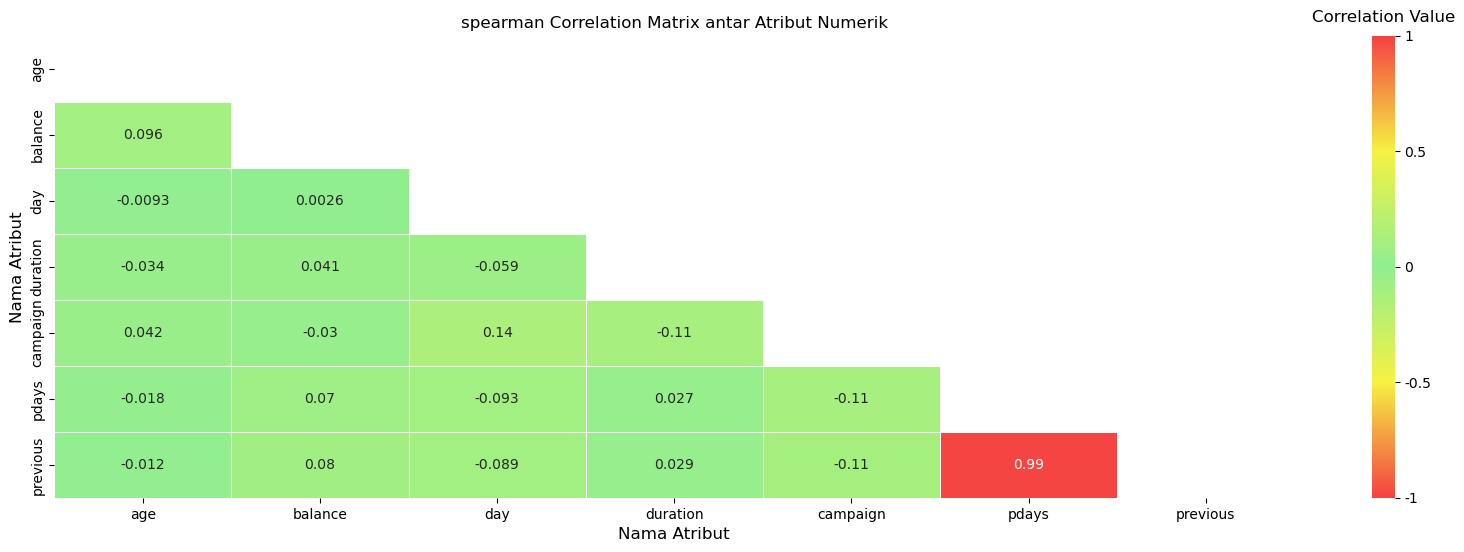

In [79]:
# Membuat correlation matrix menggunakan fungsi f_hubungan_atribut_numerik
df_temp = Xy_train_4.drop(columns=['y'])
f_hubungan_atribut_numerik(df_temp, 'spearman')

#### iii. Mengecek hubungan antar atribut kategorik dan numerik

In [80]:
# Membuat daftar hubungan antar atribut kategorik dan numerik menggunakan f_hubungan_atr_num_tar_kat
df_temp_1 = Xy_train_4.copy()
df_temp_final = pd.DataFrame()
for i in kolom_kategorik:
    df_temp_2 = f_hubungan_atr_num_tar_kat(df_temp_1, i)
    df_temp_final = pd.concat([df_temp_final, df_temp_2], ignore_index=True)

In [81]:
# Memperlihatkan data
df_temp_final['keterangan'].value_counts()

keterangan
atribut dan target memiliki hubungan     57
atribut dan target tidak ada hubungan     6
Name: count, dtype: int64

### **b. Handling multicollinearity**

#### i. Mengecek feature importance dari masing-masing atribut

In [82]:
# List berisi kolom atribut kategorik dan numerik
kolom_kategorik = [i for i in X_train_4.columns if X_train_4[i].dtype == 'O']
kolom_numerik = [i for i in X_train_4.columns if X_train_4[i].dtype != 'O']

# Pipeline untuk menggabungkan data kategorik dan numerik yang sudah ditangani
preprocessor = ColumnTransformer([('num', StandardScaler(), kolom_numerik),
                                  ('cat', OneHotEncoder(), kolom_kategorik)])

# Mendefinisikan pipeline utama dengan menggunakan preprocessing_pipeline sebelumnya
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
# Model training
rf_pipeline.fit(X_train_4, y_train_4)

# Membuat daftar feature importance per feature
rf_model = rf_pipeline.named_steps['randomforestclassifier']
ohe = rf_pipeline.named_steps['columntransformer'].named_transformers_['cat']
feature_names = kolom_numerik + list(ohe.get_feature_names_out(kolom_kategorik))
importances = rf_model.feature_importances_

# Memasukkan feature importance ke dalam dataframe
feature_importances = pd.DataFrame({'Feature': feature_names,
                                    'Importance': importances})

In [83]:
# Memperlihatkan feature importance
feature_importances.sort_values(by='Importance', ascending=True)

,Feature,Importance
18,job_None,0.001132
27,default_yes,0.001196
26,default_no,0.001253
10,job_housemaid,0.003262
9,job_entrepreneur,0.003350
37,month_dec,0.004078
33,contact_telephone,0.004280
13,job_self-employed,0.004337
17,job_unemployed,0.004339
15,job_student,0.004503


#### ii. Feature Selection

Berdasarkan pengecekan nilai korelasi antar atribut numerik, terdapat dua atribut numerik yang saling berkorelasi tinggi. Dua atribut tersebut adalah pdays dan previous. Lalu, berdasarkan hasil feature importance sebelumnya, feature importance pada atribut previous lebih kecil daripada atribut pdays. Maka dari itu, untuk menurunkan tingkat multikolinearitas pada data, atribut previous bisa dihilangkan.

Lalu, berdasarkan hasil feature importance sebelumnya, terdapat beberapa atribut yang memiliki nilai feature importance yang kecil, yakni:
* Job
* default
* education
* Marital

Maka dari itu, untuk menurunkan tingkat multikolinearitas pada data, atribut-atribut ini bisa dihilangkan.

In [84]:
# Membuat dataset baru yang telah dilakukan feature selection sebagai multicollinearity handling
X_train_5 = X_train_4.copy()
y_train_5 = y_train_4.copy()
X_test_5 = X_test_4.copy()
y_test_5 = y_test_4.copy()
X_train_5 = X_train_5.drop(columns=['previous', 'job', 'default', 'education', 'marital'])
X_test_5 = X_test_5.drop(columns=['previous', 'job', 'default', 'education', 'marital'])

### **c. Membandingkan performa model sebelum dan sesudah handling multicollinearity**

#### i. Menguji performa model tanpa handling multicollinearity (tanpa outlier handling dan tanpa imbalanced data handling)

In [85]:
# Hasil evaluasi model tanpa multicollinearity
# (tanpa outlier handling dan tanpa imbalanced data handling)
df_results_4

,Classifier,Precision Train,Precision Test
0,LogisticRegression,0.653829,0.644483
1,KNeighborsClassifier,0.759664,0.599002
2,SVC,0.755966,0.687500
3,DecisionTreeClassifier,1.000000,0.465691
4,RandomForestClassifier,1.000000,0.669355


#### ii. Menguji performa model sesudah handling multicollinearity (tanpa outlier handling dan tanpa imbalanced data handling)

In [86]:
# List berisi kolom atribut kategorik dan numerik
kolom_kategorik = [i for i in X_train_5.columns if X_train_5[i].dtype == 'O']
kolom_numerik = [i for i in X_train_5.columns if X_train_5[i].dtype != 'O']

# Menggunakan fungsi f_mencoba_data_dengan_model untuk melihat performa model dengan multicollinearity handling
# (tanpa outlier handling dan tanpa imbalanced data handling)
df_results_5 = f_mencoba_data_dengan_model(categorical_columns = kolom_kategorik,
                                           numerical_columns = kolom_numerik,
                                           X_train = X_train_5,
                                           y_train = y_train_5,
                                           X_test = X_test_5,
                                           y_test = y_test_5)
df_results_5

,Classifier,Precision Train,Precision Test
0,LogisticRegression,0.654496,0.653025
1,KNeighborsClassifier,0.753293,0.598326
2,SVC,0.733881,0.682796
3,DecisionTreeClassifier,1.000000,0.489037
4,RandomForestClassifier,1.000000,0.649222


#### iii. Evaluasi handling multicollinearity berdasarkan performa model

Berdasarkan penemuan di atas,
* Nilai evaluasi dari model tanpa multicollinearity handling maupun dengan multicollinearity handling memiliki nilai yang relatif sama.
* Penghapusan fitur-fitur ini belum cukup untuk menurunkan tingkat multikolinearitas pada data.

Maka dari itu, multicollinearity handling dengan metode feature selection tidak dilakukan.

In [87]:
# Hasil evaluasi model tanpa handling outlier dan handling imbalanced data
df_results_5 = df_results_4.copy()

# Dataset tanpa handling outlier dan handling imbalanced data
X_train_5 = X_train_4.copy()
y_train_5 = y_train_4.copy()
X_test_5 = X_test_4.copy()
y_test_5 = y_test_4.copy()

## **G. Scaling**

Untuk menangani kondisi data dengan rentang yang berbeda-beda, teknik yang dilakukan adalah scaling menggunakan RobustScaler, karena:
* Distribusi data tidak normal
* Terdapat banyak data yang dianggap sebagai outlier

Penanganan akan dilakukan pada pipeline

## **H. Encoding**

Untuk menangani kondisi data kategorik, teknik yang dilakukan adalah encoding menggunakan One-Hot Encoding, karena:
* Atribut kategorik yang dimiliki bersifat nominal dimana tidak ada urutan dari nilainya.

Penanganan akan dilakukan pada pipeline

# **vi. Model Definition, Training, and Evaluation**

## **A. Model Definition with baseline hyperparameters**

Bagian ini bebrtujuan untuk membuat beberapa model dengan hyperparameter baseline. Model yang digunakan adalah Logistic Regression, KNN, SVM, Decision tree, random forest, dan XGBoost. Pemodelan ini dilakukan dengan menggunakan fitur pipeline yang isinya terdiri dari scaler, encoder, imputer (missing values handling). Selain itu, bagian ini juga menghitung model evaluation berdasarkan cross validation dengan membandingkan data prediksi dengan data asli.

Data yang digunakan adalah data tanpa outlier handling, tanpa imbalanced data handling, dan tanpa multicollinearity handling.

In [88]:
def f_baseline_model(categorical_columns, numerical_columns, X_train, y_train, X_test, y_test):
    # Pipeline untuk menangani data numerik
    pipeline_atr_num = make_pipeline(SimpleImputer(strategy='mean'),
                                     StandardScaler())
    # Pipeline untuk menangani data kategorik
    pipeline_atr_kat = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                     OneHotEncoder(handle_unknown="ignore"))
    # Pipeline untuk menggabungkan data kategorik dan numerik yang sudah ditangani
    preprocessing_pipeline = ColumnTransformer([('pipe_num', pipeline_atr_num, numerical_columns),
                                                ('pipe_kat', pipeline_atr_kat, categorical_columns)])
    # Daftar model yang akan digunakan
    classifiers = {
        'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
        'KNeighborsClassifier': KNeighborsClassifier(),
        'SVC': SVC(random_state=42),
        'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
        'RandomForestClassifier': RandomForestClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42)
    }

    # Melakukan mapping data atribut target (y) dimana 'yes' menjadi 1 dan 'no' menjadi 0
    le = LabelEncoder()
    le.fit(['no', 'yes'])
    y_train = le.transform(y_train)
    y_test = le.transform(y_test)

    # Membuat list kosong yang akan diisi hasil pemodelan
    results = []

    # Melakukan looping berdasarkan jumlah model yang ditetapkan sebelumnya
    for name, model in classifiers.items():
        # Mendefinisikan pipeline utama dengan menggunakan preprocessing_pipeline sebelumnya
        pipe = make_pipeline(preprocessing_pipeline, model)
        
        # Model training
        start_train_time = time.time()
        pipe.fit(X_train, y_train)
        end_train_time = time.time()
        
        # Model testing
        start_pred_time = time.time()
        y_train_pred = pipe.predict(X_train)
        y_test_pred = pipe.predict(X_test)
        end_pred_time = time.time()
        
        # Model evaluation - precision
        precision_train = precision_score(y_train, y_train_pred, pos_label=1, zero_division=0)
        precision_test = precision_score(y_test, y_test_pred, pos_label=1, zero_division=0)

        # Model evaluation menggunakan cross validation
        start_cv_time = time.time()
        precision_scorer = make_scorer(precision_score, pos_label=1)
        precision_train_CV = cross_val_score(pipe,
                                          X_train,
                                          y_train,
                                          cv=5,
                                          scoring=precision_scorer)
        end_cv_time = time.time()

        # Menghitung jumlah waktu dari masing-masing kegiatan, training, predicting, dan cross evaluation
        training_time_seconds = end_train_time - start_train_time
        training_minutes, training_seconds = divmod(training_time_seconds, 60)
        predicting_time_seconds = end_pred_time - start_pred_time
        predicting_minutes, predicting_seconds = divmod(predicting_time_seconds, 60)
        cv_time_seconds = end_cv_time - start_cv_time
        cv_minutes, cv_seconds = divmod(cv_time_seconds, 60)
        if training_minutes == 0:
            training_time = str(round(training_seconds, 2)) + ' sec'
        else:
            training_time = str(round(training_minutes, 2)) + ' min'
        if predicting_minutes == 0:
            predicting_time = str(round(predicting_seconds, 2)) + ' sec'
        else:
            predicting_time = str(round(predicting_minutes, 2)) + ' min'
        if cv_minutes == 0:
            cv_time = str(round(cv_seconds, 2)) + ' sec'
        else:
            cv_time = str(round(cv_minutes, 2)) + ' min'
        
        # Memasukkan hasil evaluasi ke dalam dataframe
        results.append({
            'Classifier': name,
            'Training Time': training_time,
            'Predicting Time' : predicting_time,
            'Cross-Validation Time' : cv_time,
            'Precision Train': precision_train.round(3),
            'Precision Train CV (Mean)': precision_train_CV.mean().round(3),
            'Precision Train CV (Std)': precision_train_CV.std(),
            'Precision Test': precision_test.round(3)
        })
    df_temp = pd.DataFrame(results)

    # Mengembalikkan dataframe
    return df_temp

In [89]:
# Membuat list berisikan nama atribut kategorik dan numerik
kolom_kategorik = [i for i in X_train_5.columns if X_train_5[i].dtype == 'O']
kolom_numerik = [i for i in X_train_5.columns if X_train_5[i].dtype != 'O']

In [90]:
# Melkukan pemodelan menggunakan model dengan hyperparameter baseline
# Menggunakan data tanpa outlier handling, tanpa imbalanced data handling, dan tanpa multicollinearity handling.
df_results_6 = f_baseline_model(categorical_columns = kolom_kategorik,
                            numerical_columns = kolom_numerik,
                            X_train = X_train_5,
                            y_train = y_train_5,
                            X_test = X_test_5,
                            y_test = y_test_5)
df_results_6

,Classifier,Training Time,Predicting Time,Cross-Validation Time,Precision Train,Precision Train CV (Mean),Precision Train CV (Std),Precision Test
0,LogisticRegression,0.2 sec,0.08 sec,0.84 sec,0.654,0.652,0.022543,0.644
1,KNeighborsClassifier,0.09 sec,2.13 sec,2.11 sec,0.760,0.585,0.016058,0.599
2,SVC,20.81 sec,28.86 sec,1.0 min,0.756,0.677,0.019587,0.688
3,DecisionTreeClassifier,0.41 sec,0.08 sec,1.69 sec,1.000,0.469,0.014988,0.465
4,RandomForestClassifier,3.68 sec,0.62 sec,14.61 sec,1.000,0.658,0.011631,0.651
5,XGBoost,1.51 sec,0.14 sec,1.38 sec,0.880,0.642,0.014453,0.629


Semua model memiliki standar deviasi precision train yang mirip dimana semuanya memiliki tingkatan variasi yang sama.

### **1. Pembahasan evaluasi pemodelan dengan Model Logistic Regression**

Walau model Logistic Regression memiliki cara kerja pelatihan yang berbeda dengan Model K-Nearest Neighbors, model ini memiliki kecepatan waktu training tercepat kedua setelah Model K-Nearest Neighbors. Hal ini terjadi karena model yang bersifat simpel. Model ini memiliki hasil evaluasi yang lebih baik daripada model yang lain. Walau nilai precision train adalah 0.6, tapi nilai precision test adalah 0.6. Hal ini berarti tidak ada overfit pada data. Kemudian, nilai precision train hasil cross validation memiliki nilai yang sama dengan precision train. Diasumsikan hal ini terjadi karena model memiliki perhitungan yang sederhana dan dapat menemukan pola linear dari data.

### **2. Pembahasan evaluasi pemodelan dengan Model K-Nearest Neighbors**

* Model K-Nearest Neighbors adalah model yang memiliki waktu yang tercepat dalam pelatihan model dibandingkan model yang lain, yakni 0.1 detik. Hal ini terjadi karena model ini tidak mempelajari pola yang dimiliki oleh data, melainkan menggunakan keseluruhan data training untuk testing. Sehingga, model ini tidak melakukan perhitungan kompleks yang menyebabkan cepatnya waktu training.

* Namun, model ini memiliki waktu yang lama dalam prediksi model, yakni 4.37 detik. Hal ini terjadi karena model perlu menghitung jarak dari masing-masing titik poin test dengan masing-masing data test. Hal ini menyebabkan perhitungan menjadi kompleks dan membuat waktu prediksi menjadi lama.

* Model ini memiliki jarak evaluasi train dengan evaluasi test yang besar, 0.926-0.724. Diasumsikan hal ini disebabkan oleh adanya outlier yang banyak pada data (20%). Dalam training, model ini melakukan pengujian secara menyeluruh karena tidak melakukan perhitungan yang kompleks. Hal ini menyebabkan nilai evaluasi train yang tinggi. Lalu, dalam testing, model ini melakukan perhitungan menghitung jarak dari poin test dengan semua poin train, termasuk poin yang dianggap sebagai outlier. Sehingga, poin dengan jarak yang jauh bisa saja memiliki pengaruh dan merendahkan kualitas model. Hal ini yang menyebabkan nilai evaluasi test yang lebih rendah dibandingkan train.

* Alasan dari besarnya jarak evaluasi train dengan evaluasi test adalah karena model ini menganggap pengaruh dari masing-masing feature adalah sama. Kondisi ini tidak cocok pada data yang digunakan dimana memiliki tingkat multicollinearitas yang tinggi.

### **3. Pembahasan evaluasi pemodelan dengan Model SVM**

Model SVM adalah dengan pelatihan dan prediksi model yang membutuhkan waktu terlama dibandingkan model yang lain, yakni 1 menit untuk training dan 1 menit untuk prediksi. Hal ini terjadi karena model ini melakukan perhitungan yang kompleks pada training dan testing. Model SVC perlu membuat hyperplane yang cocok yang dapat memaksimalkan margin antar kelompok data yang berbeda. Karena data yang digunakan berukuran besar (50000 data), model ini membutuhkan waktu yang lama untuk training dan testing dimana seharusnya model ini hanya cocok pada data yang berukuran kecil.

Untuk menangani kondisi imbalanced data, sebelumnya dilakukan oversampling dengan SMOTE-NC. Hal ini dapat menyebabkan adanya banyak poin sintetis yang muncul di dekat decision boundary. Kondisi ini dapat menyebabkan perhitungan semakin kompleks dan menyebabkan evaluasi menjadi overfit.

### **4. Pembahasan evaluasi pemodelan dengan Model Decision Tree**

Mirip dengan KNN, model decision tree memiliki teknik untuk meningat seluruh data training dengan membuat cabang-cang pohon. Namun, bisa saja test data memiliki karakteristik yang berbeda dengan data train yang menyebabkan model tidak bisa menjelaskan nilai dari data ini. Hasilnya adalah model mengalami overfit. Kondisi ini yang merupakan penyebab model decision tree yang memiliki evaluation train 1, namun memiliki evaluation test yang rendah (0.6).

Model ini sensitif terhadap kondisi imbalanced data karena dapat memberikan pengaruh yang besar pada kategori yang berjumlah banyak. Walau metode SMOTE-NC digunakan untuk menangani kondisi ini, data sintetis baru yang dibuat bisa saja memiliki karakteristik yang mirip dengan data sebelumnya. Kondisi ini membuat model tidak mendapatkan informasi baru dan generalisasi yang buruk. Kondisi ini juga berpengaruh terhadap evaluation test yang rendah (0.6).

Model ini terbukti mengalami overfit karena nilai precision train hasil cross-validation berada jauh di bawah nilai precision train.

### **5. Pembahasan evaluasi pemodelan dengan Model Random Forest**

Walau memiliki cara kerja yang mirip dengan model decision tree, model Random Forest membutuhkan waktu pelatihan dan prediksi yang lebih lama dibandingkan decision tree, yakni 6.5 detik untuk training dan 1 detik untuk testing dibandingkan dengan 0.5 detik dan 0.1 detik pada model decision tree. Hal ini terjadi karena model ini bekerja dengan membuat decision tree dengan jumlah lebih dari satu. Pembuatan banyak pohon ini menyebabkan perhitungan yang semakin banyak dan lama.

Model ini memiliki hasil evaluasi test yang lebih baik dibandingkan dengan decision tree (0.72 dibandingkan 0.62). Hal ini terjadi karena selain membuat decision tree berjumlah banyak, model ini juga menerapkan pengaturan split decision tree yang bersifat random dan pengaturan kedalaman pohon yang dibuat agar tidak sampai habis. Lalu, perhitungan prediksi juga berdasarkan akumulasi rata-rata perhitungan semua pohon. Kondisi ini menyebabkan model random forest bisa tergeneralisasi pada data baru (unseen data) yang lebih baik daripada decision tree.

Model ini terbukti mengalami overfit karena nilai precision train hasil cross-validation berada jauh di bawah nilai precision train.

### **6. Pembahasan evaluasi pemodelan dengan Model XGBoost**

Model ini memiliki hasil evaluasi yang mirip dengan random forest. Hal ini terjadi karena keduanya hampir memiliki metode/cara kerja yang sama.

Model ini terbukti mengalami overfit karena nilai precision train hasil cross-validation berada jauh di bawah nilai precision train.

## **B. Model Definition with hyperparameters-tuning**

Berdasarkan hasil dari poin sebelumnya, model logistic regression memiliki performa yang paling baik dibandingkan model yang lain. Bagian ini bertujuan untuk membuat beberapa model logistic regression dengan hyperparameter yang berbeda-beda dari data yang sudah dipersiapkan dari proses FE. Hyperparameter yang digunakan adalah penalty, l1_ratio, C, dan Solver.

In [91]:
def f_log_reg_hyperparam_tuning(numerical_columns, categorical_columns, X_train, y_train, X_test, y_test, metric = 'accuracy'):
    grid_search_params = {}

    # Hyperparameter untuk penalty elasticnet
    grid_search_params[0] = {'logisticregression__penalty': ['elasticnet'],
                               'logisticregression__l1_ratio': np.linspace(0, 1, 11),
                               'logisticregression__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                               'logisticregression__solver': ['saga']}
    
    # Hyperparameter untuk penalty l1
    grid_search_params[1] = {'logisticregression__penalty': ['l1'],
                               'logisticregression__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                               'logisticregression__solver': ['liblinear', 'saga']}
    
    # Hyperparameter untuk penalty l2
    grid_search_params[2] = {'logisticregression__penalty': ['l2'],
                               'logisticregression__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                               'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}
    
    # Hyperparameter untuk penalty None
    grid_search_params[3] = {'logisticregression__penalty': [None],
                               'logisticregression__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}
    
    pipeline_atr_num = make_pipeline(SimpleImputer(strategy='mean'),
                                     StandardScaler())
    pipeline_atr_kat = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                     OneHotEncoder(handle_unknown="ignore"))

    preprocessing_pipeline = ColumnTransformer([('pipe_num', pipeline_atr_num, numerical_columns),
                                                ('pipe_kat', pipeline_atr_kat, categorical_columns)])
    

    le = LabelEncoder()
    y_train = le.fit_transform(y_train)  # 'yes' becomes 1, 'no' becomes 0
    y_test = le.transform(y_test)

    pipe = make_pipeline(preprocessing_pipeline, LogisticRegression(max_iter=1000))


    df_temp_old = pd.DataFrame()
    for i in grid_search_params:
        model = GridSearchCV(estimator=pipe,
                                   param_grid=grid_search_params[i],
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2,
                                   scoring=metric)
        
        start_train_time = time.time()
        model.fit(X_train, y_train)
        end_train_time = time.time()

        start_pred_time = time.time()
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        end_pred_time = time.time()

        training_time_seconds = end_train_time - start_train_time
        training_minutes, training_seconds = divmod(training_time_seconds, 60)
        predicting_time_seconds = end_pred_time - start_pred_time
        predicting_minutes, predicting_seconds = divmod(predicting_time_seconds, 60)

        if training_minutes == 0:
            training_time = str(round(training_seconds, 2)) + ' sec'
        else:
            training_time = str(round(training_minutes, 2)) + ' min'
        if predicting_minutes == 0:
            predicting_time = str(round(predicting_seconds, 2)) + ' sec'
        else:
            predicting_time = str(round(predicting_minutes, 2)) + ' min'

        if metric == 'accuracy':
            evaluation_train = accuracy_score(y_train, y_train_pred)
            evaluation_test = accuracy_score(y_test, y_test_pred)
        elif metric == 'precision':
            evaluation_train = precision_score(y_train, y_train_pred)
            evaluation_test = precision_score(y_test, y_test_pred)
        elif metric == 'recall':
            evaluation_train = recall_score(y_train, y_train_pred)
            evaluation_test = recall_score(y_test, y_test_pred)
        elif metric == 'f1':
            evaluation_train = f1_score(y_train, y_train_pred)
            evaluation_test = f1_score(y_test, y_test_pred)

        list = [f'{key.replace("logisticregression__", "")}: {value}' for key, value in model.best_params_.items()]
        df_temp_new = pd.DataFrame({'hyperparameter-tuning time': training_time,
                                    'predicting time' : predicting_time,
                                    'hyperparameters': [', '.join(list)],
                                    f'{metric}_train': [evaluation_train],
                                    f'{metric}_test': [evaluation_test]})

        df_temp_old = pd.concat([df_temp_old, df_temp_new])

    return df_temp_old

In [92]:
# List berisi kolom atribut kategorik dan numerik
kolom_kategorik = [i for i in X_train_5.columns if X_train_5[i].dtype == 'O']
kolom_numerik = [i for i in X_train_5.columns if X_train_5[i].dtype != 'O']

In [99]:
df_results_7 = f_log_reg_hyperparam_tuning(numerical_columns = kolom_numerik,
                                        categorical_columns = kolom_kategorik,
                                        X_train = X_train_5,
                                        y_train = y_train_5,
                                        X_test = X_test_5,
                                        y_test = y_test_5,
                                        metric = 'precision')

Fitting 5 folds for each of 88 candidates, totalling 440 fits


KeyboardInterrupt: 

In [92]:
df_results_7

,hyperparameter-tuning time,predicting time,hyperparameters,precision_train,precision_test
0,5.0 min,0.07 sec,"C: 0.1, l1_ratio: 0.2, penalty: elasticnet, solver: saga",0.860648,0.421932
0,38.67 sec,0.07 sec,"C: 1, penalty: l1, solver: saga",0.860732,0.422513
0,44.85 sec,0.08 sec,"C: 100, penalty: l2, solver: lbfgs",0.860781,0.421908
0,2.26 sec,0.07 sec,"penalty: None, solver: lbfgs",0.860781,0.421908


Tidak ada perbedaan yang signifikan dari evalusasi model ketika model logistic regression menggunakan hyperparameter-tuning dan yang tidak.
Lalu, walau memiliki hyperparameter penalty yang berbeda-beda, ketika menggunakan penalty elasticnet, l1, l2, atau none, tidak ada perbedaan yang signifikan dari evalusasi model.

Kemampuan dari model ini adalah bisa mengatur pengaruh dari beberapa fitur sehingga mereka memiliki pengaruh yang berbeda-beda dan bahkan bisa menghilangkan seluruh pengaruh dari suatu fitur. Kemampuan ini diatur dengan menggunakan penalty l1 (menghilangkan pengaruh dari suatu fitur), l2 (meninggikan/menurunkan pengaruh dari suatu fitur), dan elasticnet (menggunakan kombinasi l1 dan l2). Namun, walau dengan menggunakan kemampuan ini, evaluasi model masih sama dengan ketika tidak menggunakan kemampuan ini (penalty: None).

Dapat diasumsikan kondisi ini terjadi karena model logistic regression sensitif terhadap imbalanced data. Model ini bekerja dengan membuat decision boundary untuk memisahkan kelompok-kelompok data. Jika jumlah data pada beberapa kelompok tidak seimbang, model bisa saja lebih mementingkan kelompok majoritas. Lalu, walau metode SMOTE-NC digunakan untuk menangani kondisi ini, metode ini tidak mampu menyamakan pengaruh kelompok majoritas dengan kelompok minoritas. Dapat diasumsikan bahwa kelompok majoritas memiliki densitas yang lebih renggang dibandingkan kelompok minoritas.

# **vii. Model Saving**

Berdasarkan penemuan sebelumnya, model yang memiliki performa yang paling baik adalah model logistic regression. Bagian ini bertujuan untuk menyimpan model ini ke dalam local agar bisa dipakai pada kebutuhan lainnya. Model yang disimpan memiliki kondisi sudah terlatih berdasarkan data yang sudah dipersiapkan pada FE. Lalu, hyperparameter yang digunakan adalah hyperparameter default.

Untuk melakukan penanganan missing values, sebelumnya dilakukan secara manual untuk mengganti data dengan nilai 'unknown' menjadi None. Lalu, bisa saja data baru yang akan digunakan dalam inference memiliki nilai None. Kondisi ini harus tetap ditangani. Maka dari itu, perlu dibuat function untuk untuk mengubah nilai 'unknown' menjadi None. Lalu, function ini perlu diintegrasikan ke dalam pipeline yang disimpan.

Eksekusi script di bawah ini untuk menyimpan model yang telah dibuat.

In [105]:
# Mendefinisikan fungsi replace_unknown_with_none untuk mengubah nilai 'unknown' menjadi None 
def replace_unknown_with_none(X):
    return X.replace('unknown', None)

In [106]:
# Mendefinisikan kembali model Logistic Regression

# Mendefinisikan nama atribut yang digunakan dalam pemodelan
kolom_kategorik = [i for i in X_train_5.columns if X_train_5[i].dtype == 'O']
kolom_numerik = [i for i in X_train_5.columns if X_train_5[i].dtype != 'O']

# Melakukan mapping data atribut target (y) dimana 'yes' menjadi 1 dan 'no' menjadi 0
le = LabelEncoder()
le.fit(['no', 'yes'])
y_train = le.transform(y_train_5)

# Pipeline untuk menangani data numerik
pipeline_atr_num = make_pipeline(SimpleImputer(strategy='mean'),
                                 StandardScaler())

# Pipeline untuk menangani data kategorik
pipeline_atr_kat = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                 OneHotEncoder(handle_unknown="ignore"))


# Pipeline untuk menggabungkan data kategorik dan numerik yang sudah ditangani
preprocessing_pipeline = ColumnTransformer([('pipe_num', pipeline_atr_num, kolom_numerik),
                                            ('pipe_kat', pipeline_atr_kat, kolom_kategorik)])

# Mendefinisikan pipeline utama dengan menggunakan preprocessing_pipeline sebelumnya
pipe = make_pipeline(FunctionTransformer(replace_unknown_with_none),
                     preprocessing_pipeline,
                     LogisticRegression(max_iter=1000))

# Model training
pipe.fit(X_train_5, y_train_5)

# Menyimpan model ke dalam local
joblib.dump(pipe, 'model.joblib')

['model.joblib']

# **viii. Model Inference**

Bagian ini bertujuan untuk mengambil/menggunakan model yang telah disimpan untuk memprediksi data baru.

In [107]:
# Mengambil model yang disimpan
loaded_model = joblib.load('model.joblib')

In [108]:
# Mempersiapkan data inference
data={'age': [44, 34],
      'job': ['blue-collar', 'technician'],
      'marital': ['married', 'married'],
      'education': ['secondary', 'secondary'],
      'default': ['no', 'no'],
      'balance': [-674, 133],
      'housing': ['yes', 'no'],
      'loan': ['no', 'no'],
      'contact': ['unknown', 'cellular'],
      'day': [5, 15],
      'month': ['may', 'nov'],
      'duration': [257, 401],
      'campaign': [1, 2],
      'pdays': [-1, 187],
      'previous': [0, 5],
      'poutcome': ['unknown', 'success']}

inference_data = pd.DataFrame(data)
inference_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,44,blue-collar,married,secondary,no,-674,yes,no,unknown,5,may,257,1,-1,0,unknown
1,34,technician,married,secondary,no,133,no,no,cellular,15,nov,401,2,187,5,success


In [109]:
# Memprediksi data inference
inference_data_predicted = loaded_model.predict(inference_data)
inference_data_predicted

array(['no', 'yes'], dtype=object)

# **vii. Kesimpulan**

Walau dengan nilai evaluasi train dan test yang rendah (bad-fit), model logistic regression dapat memberikan gambaran awal pada tim marketing akan karakteristik customer. Dengan nilai evaluasi train dan test 0.6, artinya, pada 100 customer yang memiliki kemauan untuk menerima tawaran, model hanya mampu mengidentifikasi 60 customer. Namun, model ini tidak bisa digunakan pada penentuan apakah customer akan menerima tawaran atau tidak tanpa adanya pengecekan lebih dalam oleh tim marketing.

## **viii. Rekomendasi untuk peningkatan kualitas model**

Berdasarkan penemuan sebelumnya, nilai evaluasi model KNN dan SVC memiliki nilai yang mirip dengan model logistic regression. Maka dari itu, terdapat kesempatan untuk melakukan eksplorasi atau hyperparameter tuning pada kedua model ini. Hyperparameter yang perlu dilakukan adalah dengan mengubah jarak pengaruh data luar terhadap decision boundary. Karena diasumsikan data poin memiliki densitas data yang berbeda-beda